# **Capstone Assignment 24**

**Research Question:**

Can we predict heart disease in people by looking at their basic personal and health information?

**Expected Data Source:**

The data will come from a dataset "https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset?select=heart_disease.csv" called heart_disease.csv, which includes basic personal and health information, provided as a CSV file.

**Techniques:**

To prepare the data for modeling., firstly, I cleaned it, handled missing values and outliers, encoded categorical features.

**Creating useful features from the data**

Using machine learning methods, I trained and tested seven models: Logistic Regression, Naive Bayes, SVM, Random Forest, KNN, XGBoost, and MLP.

I used GridSearchCV to tune hyperparameters for each model and evaluated them using cross-validation with ROC AUC as the scoring metric.

The best-performing model was Support Vector Machine (SVM), chosen for its high recall and ROC AUC score. This makes it suitable for identifying individuals at risk of heart disease.

**Expected Results:**

My goal is to build a reliable tool to predict heart disease based on basic personal and health details. This model will also help identify the most important risk factors, supporting early intervention by doctors and improving patient awareness.

**The project follows a structured ML pipeline, including:**
1. Import libraries
2. Data Loading
3. Exploratory Data
4. Evaluate Data Analyziz
  
  * 4.1. Evaluation Data Analysis Before Cleaning
  * 4.2. Data Cleaning
  * 4.3  Outlier Analyziz
  * 4.4  Evaluation Data Analysis After Cleaning

5. Feature Engineering
6. Train/Test split
7. Regression Modeling
8. Other Models
  * 8.1. Naive Bayes
  * 8.2 SVM Pipeline
  * 8.3 Random Forest
  * 8.4 K-Nearest Neighbors
  * 8.5 XGB Model
  * 8.6 MLP Classifier
  * 8.7 Comparison between models
9. Hyperparameter tuning
10. Selecting best model
11. Model interpretation
12. Results

**Feature Descriptions (Heart Disease Dataset)**

*   Gender:  (Male, Female)
*   age:	    Age in years
*   education:	Education level (uneducated, graduate, postgraduate, etc.)
*   currentSmoker:	Whether the person is currently a smoker (1 = Yes, 0 = No)
*   cigsPerDay:	Average number of cigarettes smoked per day (only for smokers)
*   BPMeds:	Whether the person is on blood pressure medication (1 = Yes, 0 = No)
*   prevalentStroke:	Whether the person has had a stroke in the past (yes/no)
*   prevalentHyp:	Whether the person has hypertension (1 = Yes, 0 = No)
*   diabetes:	Whether the person has diabetes (1 = Yes, 0 = No)
*   totChol:	Total cholesterol level (mg/dL)
*   sysBP:	Systolic blood pressure (top number in BP reading)
*   diaBP:	Diastolic blood pressure (bottom number in BP reading)
*   BMI:	Body Mass Index (weight relative to height)
*   heartRate:	Heart rate (beats per minute)
*   glucose:	Blood glucose level (mg/dL)
*   Heart_ stroke:	Target variable: whether they had a heart disease or stroke (Yes/No)

# **1. Install and Import Libraries**

In [65]:
!pip install eli5

In [148]:
# 1. Import libraries
import nltk
import time
import eli5
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score,f1_score, classification_report

# For consistent plot styles
sns.set_style("whitegrid")
sns.set_palette("rocket")

warnings.simplefilter(action='ignore')

# **2. Load Dataset**

In [193]:
# 2.  Load the dataset
df = pd.read_csv('heart_disease.csv')

# **3. Exploratory Data**

In [194]:
# 3.1 Preview the dataset
df.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
5,Female,43,primaryschool,0,0.0,0.0,no,1,0,228.0,180.0,110.0,30.30,77.0,99.0,No
6,Female,63,uneducated,0,0.0,0.0,no,0,0,205.0,138.0,71.0,33.11,60.0,85.0,yes
7,Female,45,primaryschool,1,20.0,0.0,no,0,0,313.0,100.0,71.0,21.68,79.0,78.0,No
8,Male,52,uneducated,0,0.0,0.0,no,1,0,260.0,141.5,89.0,26.36,76.0,79.0,No
9,Male,43,uneducated,1,30.0,0.0,no,1,0,225.0,162.0,107.0,23.61,93.0,88.0,No


In [195]:
# 3.2 Check data types and non-null values
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usag

In [196]:
# 3.3 Check the number of rows and column
print("Number of rows and columns in the dataset")
print(df.shape)

Number of rows and columns in the dataset
(4238, 16)


In [197]:
# 3.4 Check for missing values in each column
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64


In [198]:
# 3.5 The total missing values are
print("The total missing values are:")
df.isnull().sum().sum()

The total missing values are:


np.int64(645)

**@Finding**

The total missing values are: 645, which less than 15% of rows, because of that it is not helpful to remove rows since the useful data would be lost, therfore it is better to handle the missing values through imputation.

In [199]:
# 3.6 View basic statistics for numeric columns
print("Descriptive statistics of numerical variables:")
print(df.describe())

Descriptive statistics of numerical variables:
               age  currentSmoker   cigsPerDay       BPMeds  prevalentHyp  \
count  4238.000000    4238.000000  4209.000000  4185.000000   4238.000000   
mean     49.584946       0.494101     9.003089     0.029630      0.310524   
std       8.572160       0.500024    11.920094     0.169584      0.462763   
min      32.000000       0.000000     0.000000     0.000000      0.000000   
25%      42.000000       0.000000     0.000000     0.000000      0.000000   
50%      49.000000       0.000000     0.000000     0.000000      0.000000   
75%      56.000000       1.000000    20.000000     0.000000      1.000000   
max      70.000000       1.000000    70.000000     1.000000      1.000000   

          diabetes      totChol        sysBP        diaBP          BMI  \
count  4238.000000  4188.000000  4238.000000  4238.000000  4219.000000   
mean      0.025720   236.721585   132.352407    82.893464    25.802008   
std       0.158316    44.590334    22

In [200]:
# 3.7 To explor statistics of categorical variable
print("Descriptive statistics of categorical variables:")
df.describe(include=['object', 'category'])

Descriptive statistics of categorical variables:


,Gender,education,prevalentStroke,Heart_ stroke
count,4238,4133,4238,4238
unique,2,4,2,2
top,Female,uneducated,no,No
freq,2419,1720,4213,3594


In [201]:
# 3.8 Check for duplicate rows
print("Number of duplicate rows:")
print(df.duplicated().sum())

Number of duplicate rows:
0


In [202]:
# 3.9 Check unique values for categorical variables
print("Unique values in categorical features:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Unique values in categorical features:
Gender: 2 unique values
education: 4 unique values
prevalentStroke: 2 unique values
Heart_ stroke: 2 unique values


# **4.1 Evaluation Data Analysis Before Cleaning (Initial EDA)**

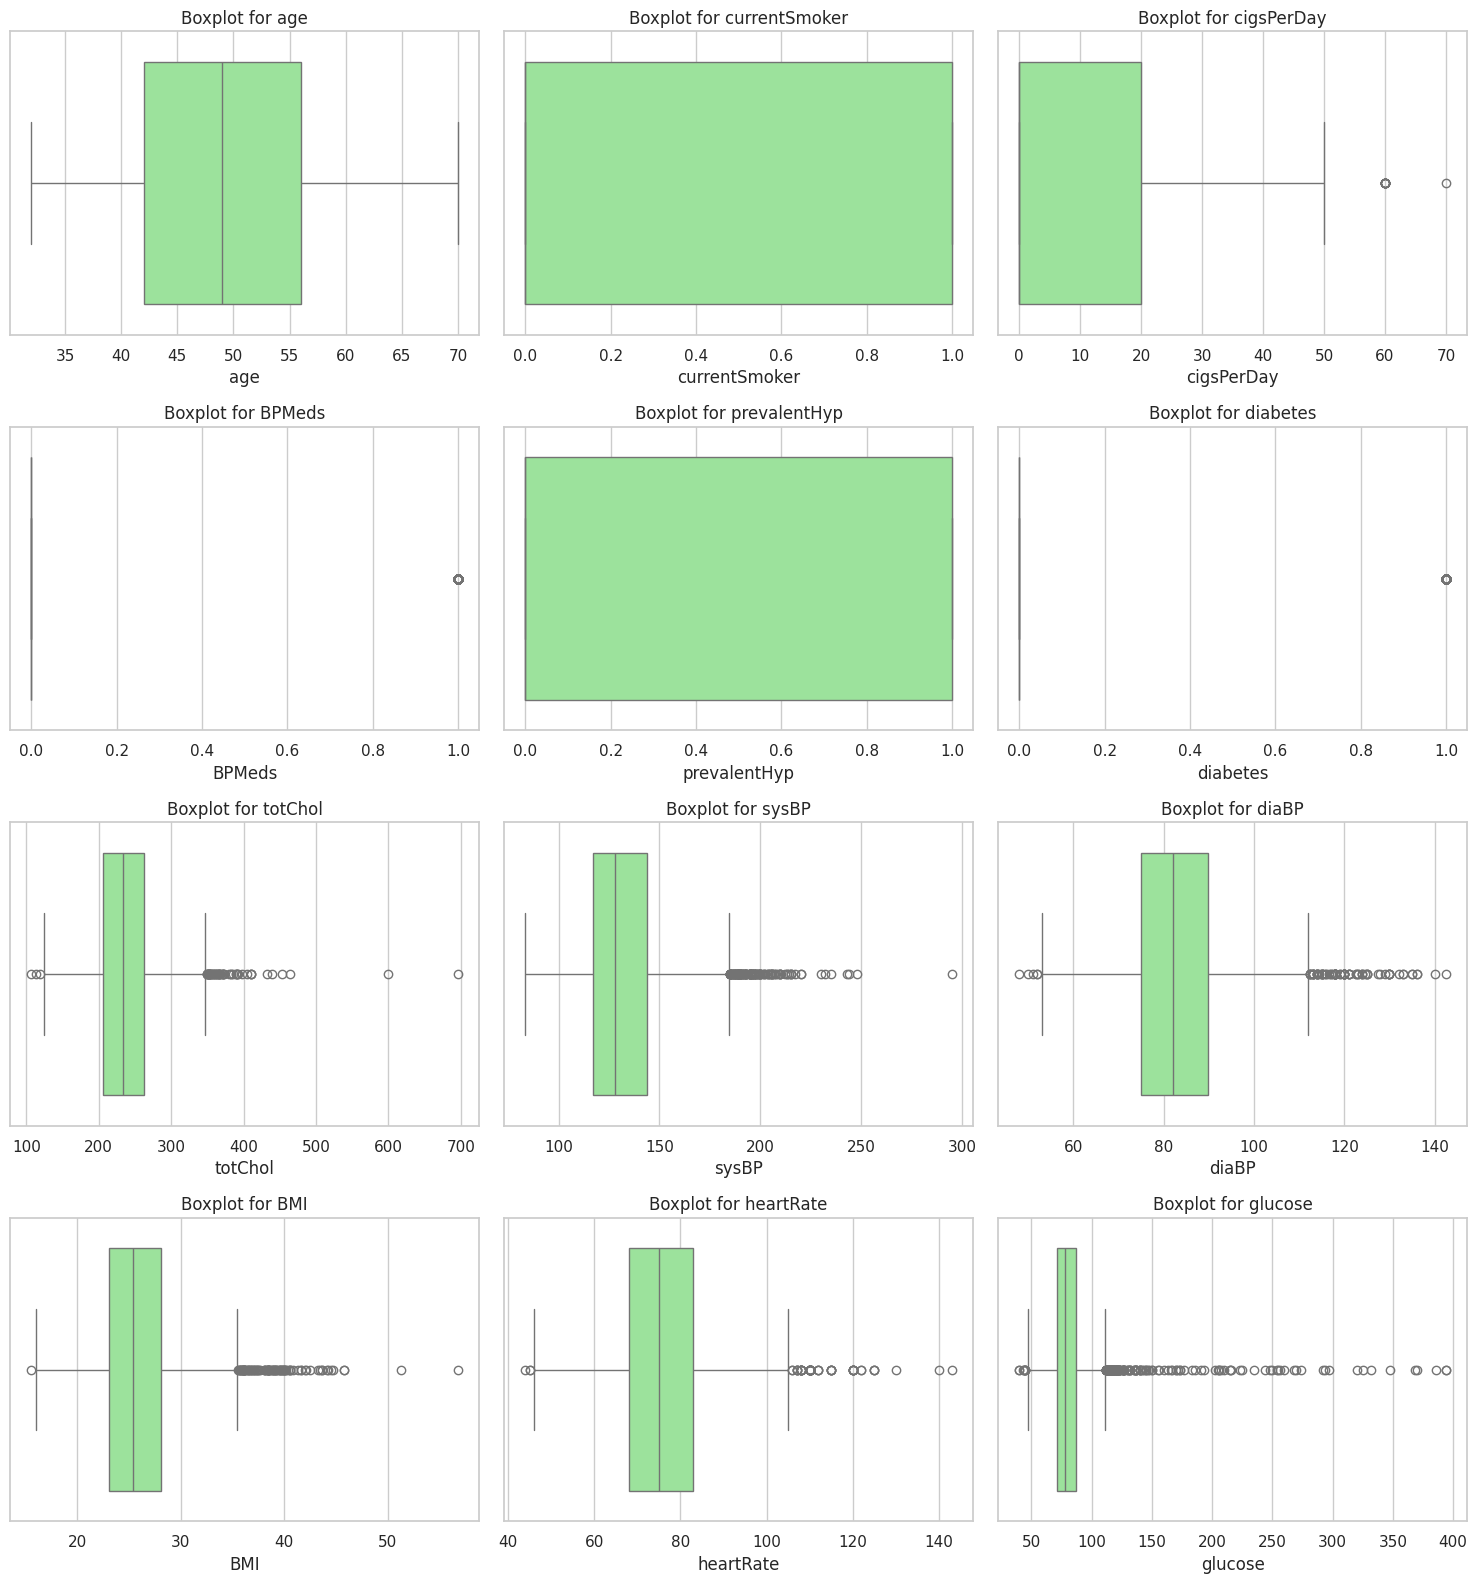

In [203]:
# 4.1.1 Boxplot
# Get numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Since there are many features, setting 3 plots per row
cols_per_row = 3
total_plots = len(numeric_cols)
rows = (total_plots + cols_per_row - 1) // cols_per_row  # Calculate number of rows needed

# Creating subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
# Flatten the axes array for easy indexing
axes = axes.flatten()

# Ploting each boxplot in a grid
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot for {col}')

# Removing any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

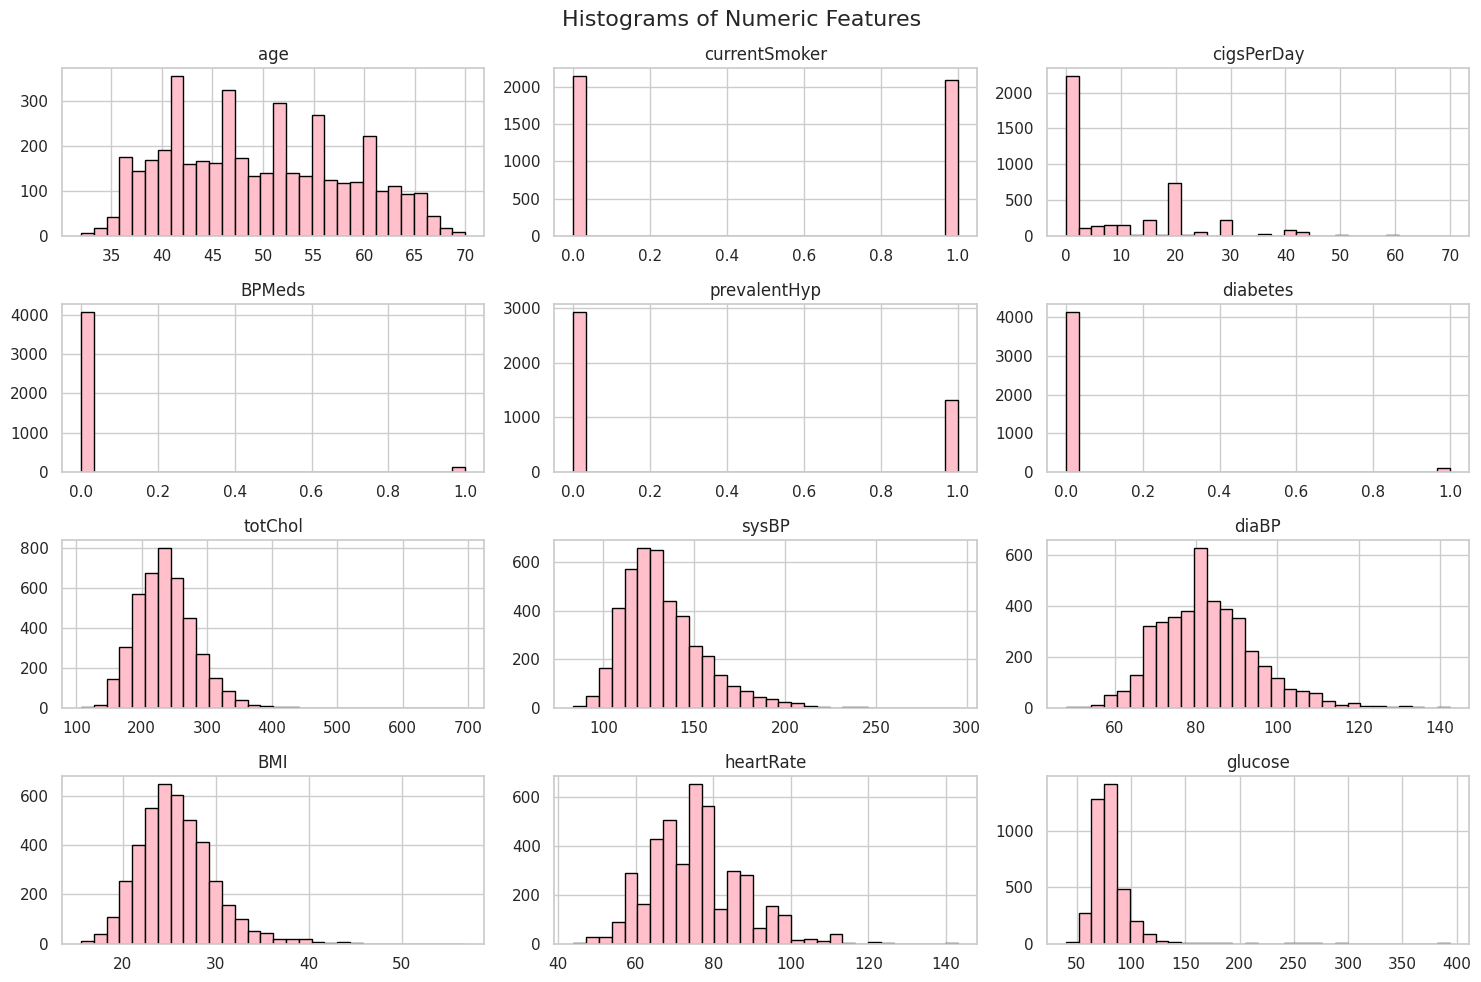

In [204]:
# 4.1.2 Histograms for all numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df[numeric_cols].hist(figsize=(15, 10), bins=30, color='pink', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

@Finding

cigsPerDay, BPMeds, prevalentHype and diabetes have a large spike at 0, this indicates many people:
*   do not smoke,
*   do not take blood pressure medications,
*   do not have hypertension, and
*   do not have diabetes.

Age and blood pressure values appear more normally distributed.

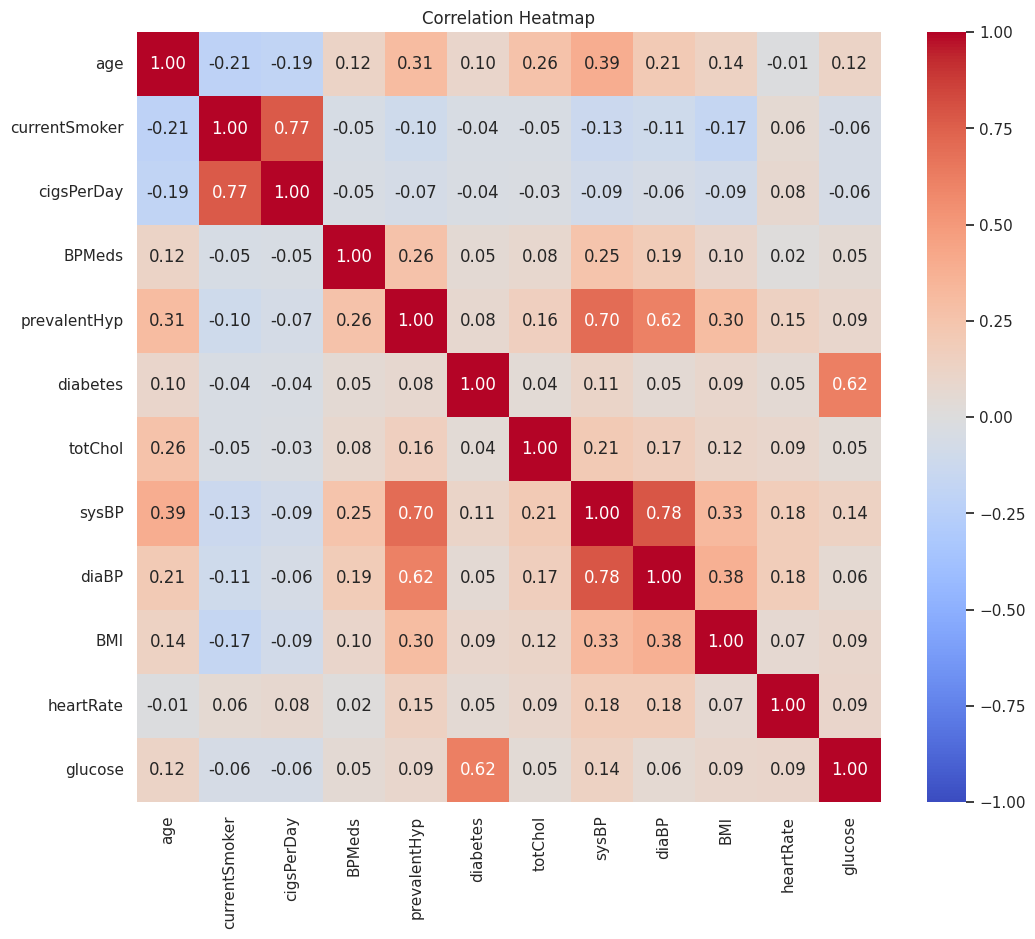

In [205]:
# 4.1.3 Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

**@Finding**

The following relationships can be seen among numerical features in the correlation heatmap:

**Strong Correlations:**
* currentSmoker <--> cigsPerDay	with +0.77 are highly correlated, as expected. More cigarettes per day correlates strongly with being a smoker.

* prevalentHyp <--> sysBP	with +0.70	shows that people with hypertension naturally have higher systolic blood pressure.

* prevalentHyp <--> diaBP	with +0.62 has the same reasoning for diastolic blood pressure.

* sysBP <--> diaBP	with +0.78 is as expected, that systolic and diastolic blood pressure rise together

* diabetes <--> glucose with +0.62	shows that diabetics tend to have higher blood glucose levels.

* age <--> sysBP	with +0.39 indicates that	older individuals tend to have higher systolic BP.

**Low Correlations:**
* heartRate shows low correlation with any other variable

* BMI, diabetes, and totChol have low positive correlations with other features

* currentSmoker is negatively correlated with age (-0.21), suggesting younger are more likely to smoke.

# **4.2. Data Cleaning**

Since the total missing values are: 645, I am going to to handle the missing values through imputation.

In [206]:
# 4.2.1 Make a copy of the dataset
df_clean = df.copy()

In [207]:
# 4.2.2 Clean column names (remove spaces, fix inconsistent naming)
df_clean.columns = df_clean.columns.str.strip().str.replace(' ', '').str.replace('-', '')

In [208]:
# 4.2.3 Rename target column for clarity
df_clean.rename(columns={'Heart_stroke': 'HeartStroke'}, inplace=True)

In [209]:
# 4.2.4 Handling missing values
# Impute numerical columns with median
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Impute categorical columns with mode
cat_cols = df_clean.select_dtypes(include='object').columns
for col in cat_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

In [210]:
# 4.2.5 Convert categorical columns to lowercase to avoid for example 'No' vs 'no' issues
for col in cat_cols:
    df_clean[col] = df_clean[col].str.lower().str.strip()

In [211]:
# 4.2.6 Preview cleaned data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4238 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  HeartStroke      4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [212]:
# 4.2.7 Check for missing values in each column
df_clean.isnull().sum()

,0
Gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


# **4.3. Outlier Analysis**

In [213]:
# 4.3.1 Save df_clean to a CSV file
df_clean.to_csv('df_clean.csv', index=False)

In [214]:
# 4.3.2 Define a function to detect outliers using IQR
def detect_outliers(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)]
    return outliers

# Columns to exclude from outlier detection
exclude_cols = []

# Get numeric columns excluding the specified ones
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
columns_to_check = [col for col in numeric_cols if col not in exclude_cols]

# Loop through each selected column and detect outliers
for col in columns_to_check:
    outliers = detect_outliers(df_clean, col)
    print(f'Number of outliers in {col}: {len(outliers)}')

Number of outliers in age: 0
Number of outliers in currentSmoker: 0
Number of outliers in cigsPerDay: 12
Number of outliers in BPMeds: 124
Number of outliers in prevalentHyp: 0
Number of outliers in diabetes: 109
Number of outliers in totChol: 57
Number of outliers in sysBP: 126
Number of outliers in diaBP: 81
Number of outliers in BMI: 97
Number of outliers in heartRate: 76
Number of outliers in glucose: 262


In [221]:
# 4.3.3 Define a function to remove outliers using the IQR method
def remove_outliers(df, columns):
    # Make a copy
    df_filtered = df.copy()

    for col in columns:
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep only rows within bounds
        df_filtered = df_filtered[
            (df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)
        ]

    return df_filtered

# Columns to exclude from outlier removal
exclude_cols = ['cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes']

# Get numeric columns and filter out the excluded ones
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
columns_to_filter = [col for col in numeric_cols if col not in exclude_cols]

# Apply outlier removal only to selected columns
df_clean_outliers = remove_outliers(df_clean, columns_to_filter)

# Show shape before and after
print("Original data shape:", df.shape)
print("Original cleaned data shape:", df_clean.shape)
print("New data shape after removing outliers:", df_clean_outliers.shape)


Original data shape: (4238, 16)
Original cleaned data shape: (4238, 16)
New data shape after removing outliers: (3640, 16)


In [222]:
# 4.3.5 Save df_clean_outliers to a CSV file
df_clean_outliers.to_csv('df_clean_outliers.csv', index=False)

# **4.4 Visual Exploratory Data Analysis after Cleaning & Outlier (EDA)**

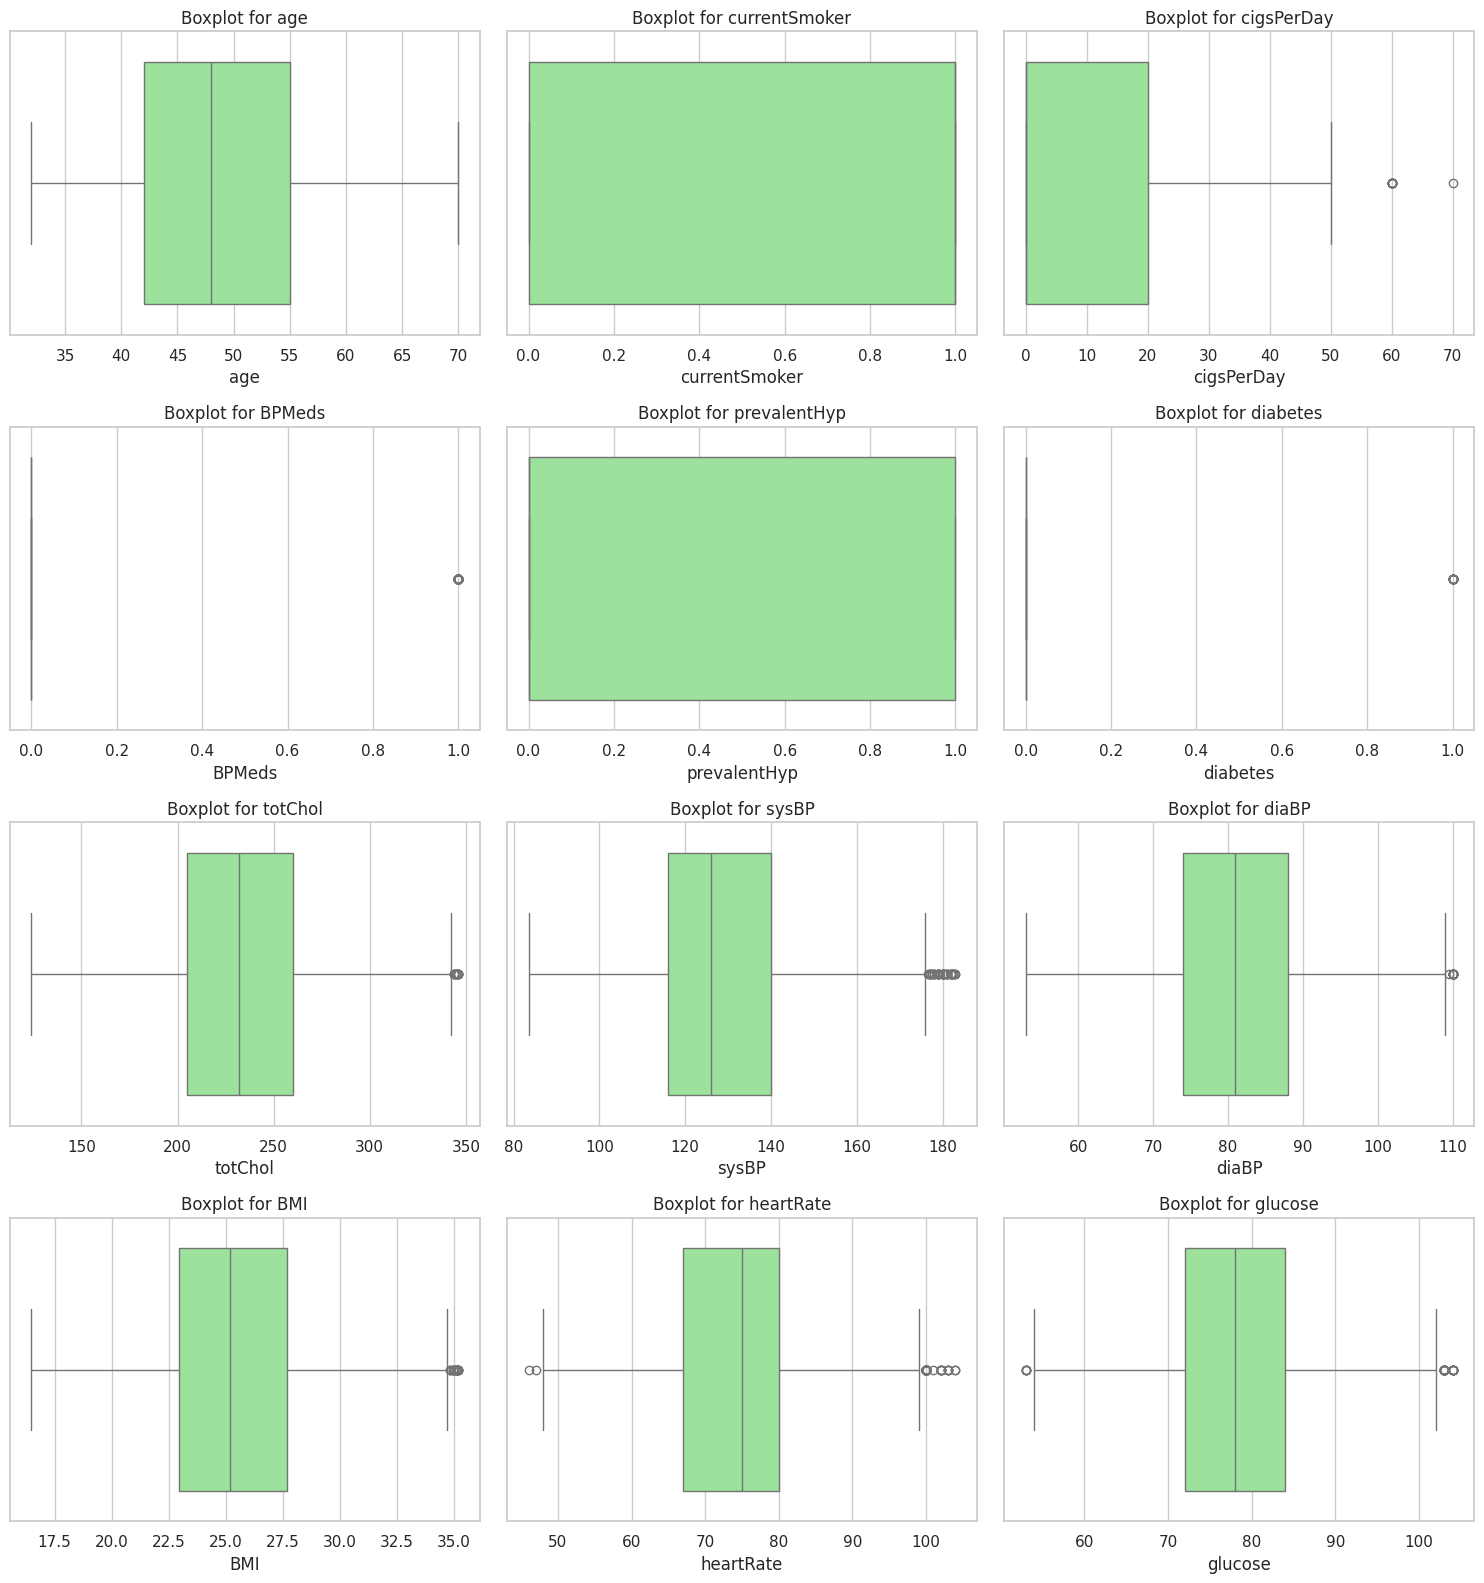

In [223]:
#4.4.1 Since there are many features, setting 3 plots per row
cols_per_row = 3
total_plots = len(numeric_cols)
rows = (total_plots + cols_per_row - 1) // cols_per_row  # Calculate number of rows needed

# Creating subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
# Flatten the axes array for easy indexing
axes = axes.flatten()

# Ploting each boxplot in a grid
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_clean_outliers[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot for {col}')

# Removing any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

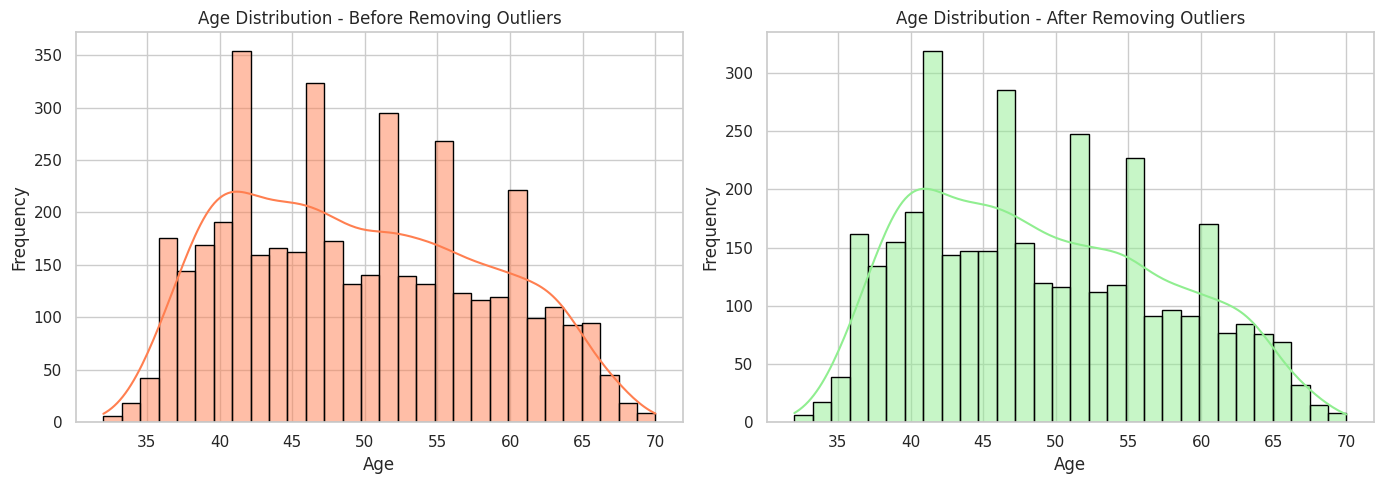

In [224]:
# 4.4.2 Distribution Plots
# Histogram of Age
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Age distribution in df_clean (before removing outliers)
sns.histplot(data=df, x='age', kde=True, bins=30, color='coral', edgecolor='black',ax=axes[0])
axes[0].set_title('Age Distribution - Before Removing Outliers')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot 2: Age distribution in df_clean_outliers (after removing outliers)
sns.histplot(data=df_clean_outliers, x='age', kde=True, bins=30, color='lightgreen', edgecolor='black', ax=axes[1])
axes[1].set_title('Age Distribution - After Removing Outliers')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**@finding:**

The side-by-side comparison of Age distribution shows that removing outliers had minimal impact on the overall age distribution, confirming that the dataset is stable in this feature

The age distribution is approximately normal, with most individuals falling between 40 and 60 years old. This suggests the dataset mainly includes middle-aged adults, a group at higher risk for heart disease and stroke.

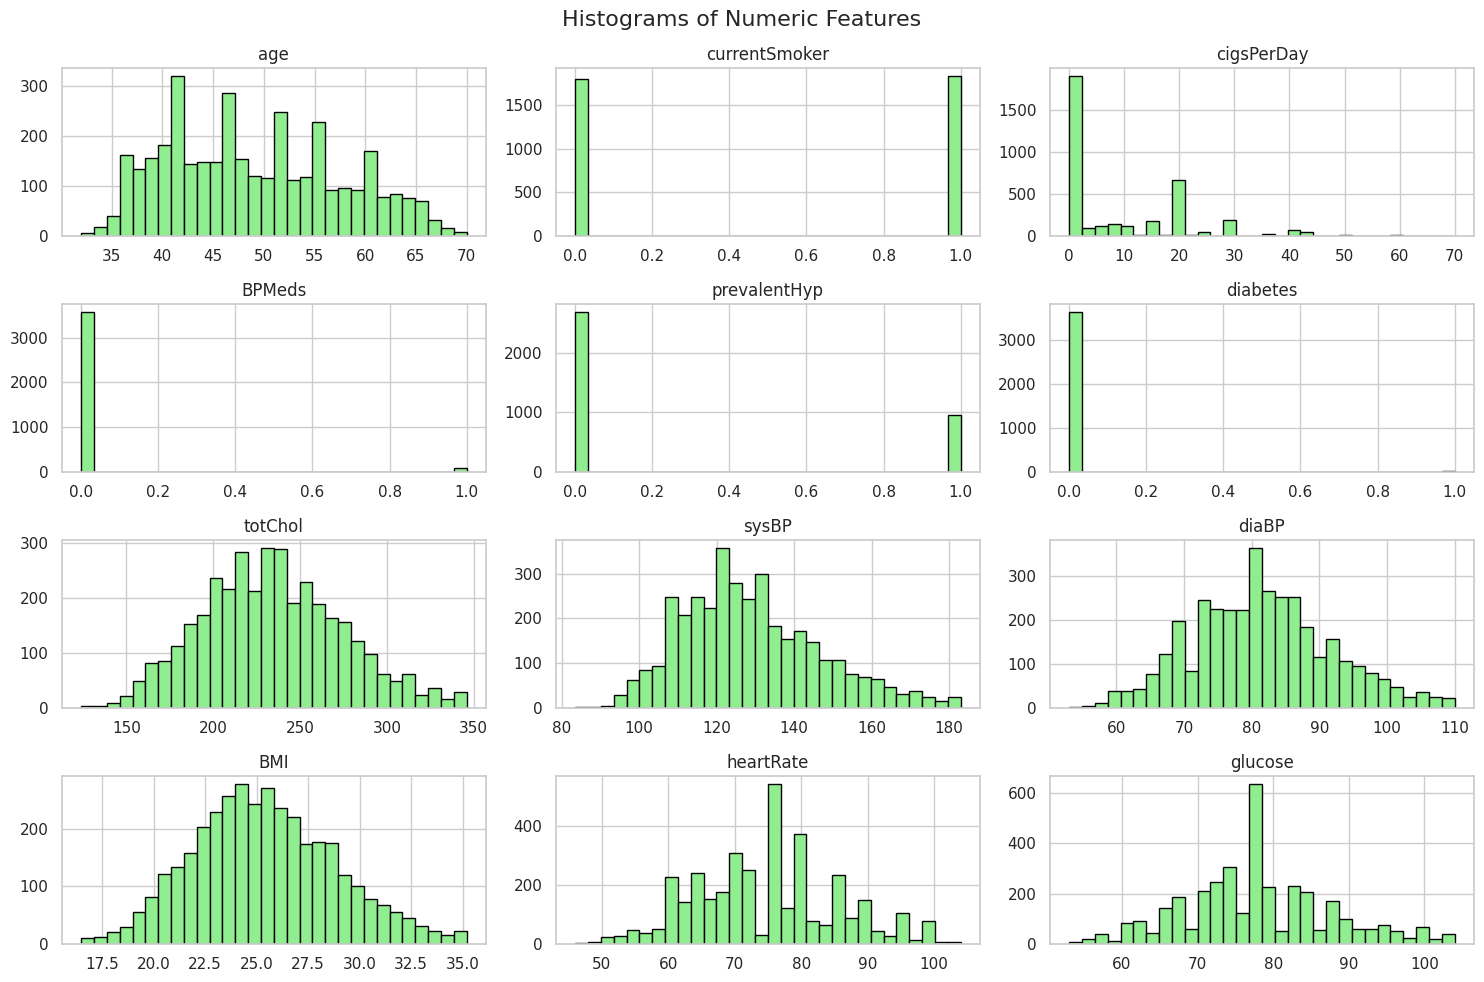

In [225]:
# 4.4.3 Histograms for all numeric columns
numeric_cols = df_clean_outliers.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df_clean_outliers[numeric_cols].hist(figsize=(15, 10), bins=30, color='lightgreen', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

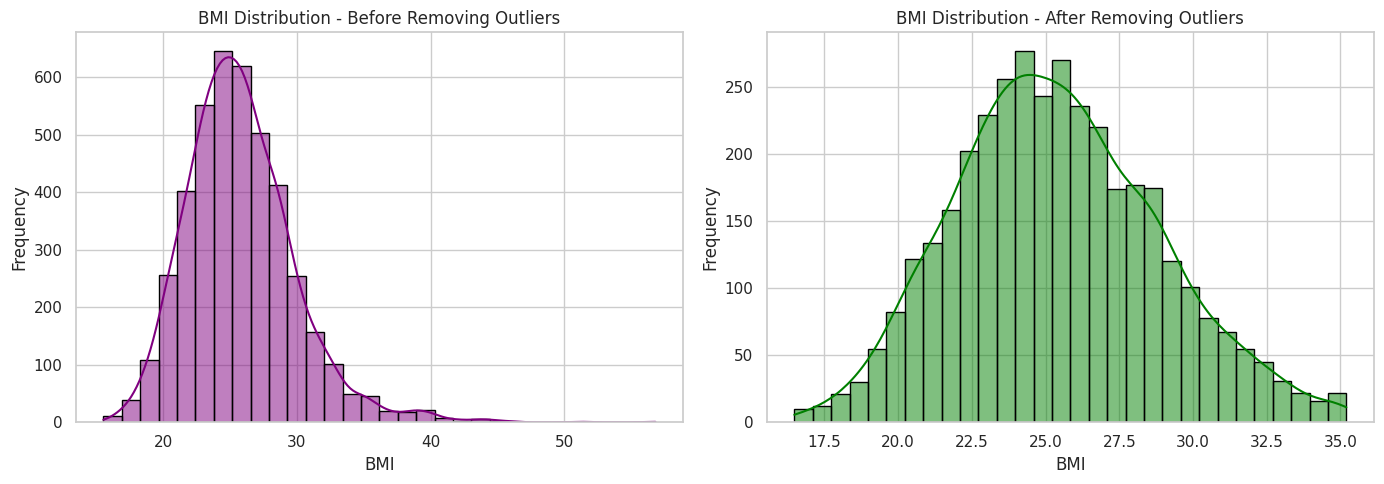

In [227]:
# 4.4.4 Distribution Plots
# Histogram of BMI
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: BMI distribution in df_clean (before removing outliers)
sns.histplot(data=df_clean, x='BMI', kde=True, bins=30, color='purple', edgecolor='black',ax=axes[0])
axes[0].set_title('BMI Distribution - Before Removing Outliers')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')

# Plot 2: BMI distribution in df_clean_outliers (after removing outliers)
sns.histplot(data=df_clean_outliers, x='BMI', kde=True, bins=30, color='green', edgecolor='black',ax=axes[1])
axes[1].set_title('BMI Distribution - After Removing Outliers')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**@finding:**

The BMI distribution is right-skewed, meaning more people are slightly overweight or obese. A few individuals have high BMI values above 40, which are considered extreme and may be outliers.

The side-by-side comparison shows that removing outliers made the BMI distribution tighter and reduced extreme values above 40.

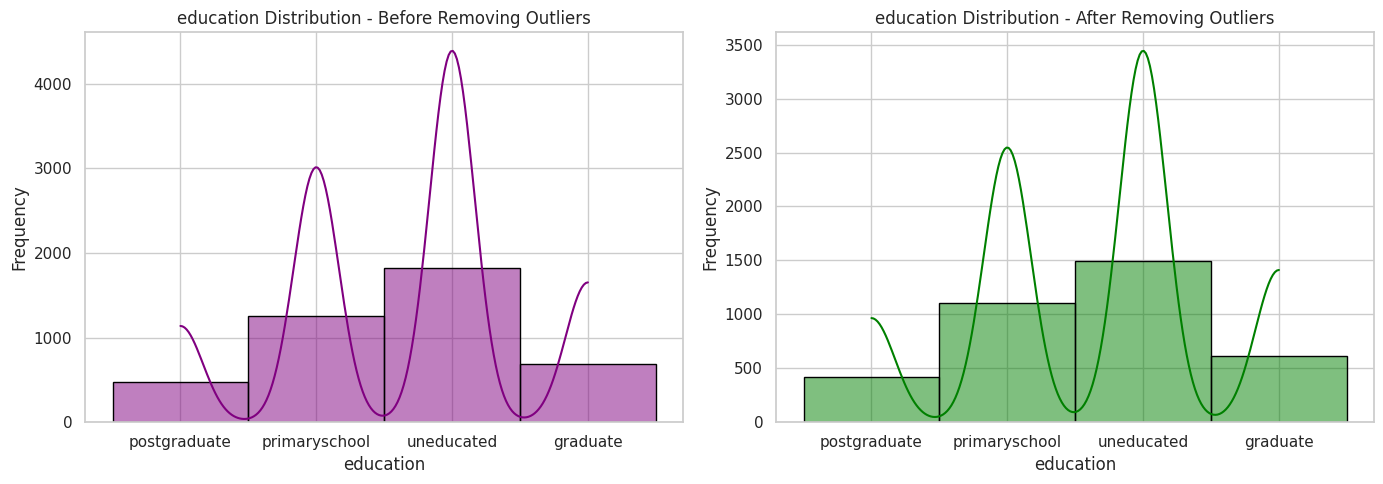

In [228]:
# 4.4.5 Distribution Plots
# education distribution
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: BMI distribution in df_clean (before removing outliers)
sns.histplot(data=df_clean, x='education', kde=True, bins=30, color='purple', edgecolor='black', ax=axes[0])
axes[0].set_title('education Distribution - Before Removing Outliers')
axes[0].set_xlabel('education')
axes[0].set_ylabel('Frequency')

# Plot 2: BMI distribution in df_clean_outliers (after removing outliers)
sns.histplot(data=df_clean_outliers, x='education', kde=True, bins=30, color='green', edgecolor='black',ax=axes[1])
axes[1].set_title('education Distribution - After Removing Outliers')
axes[1].set_xlabel('education')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**@finding:**

In these data, there are more people with low education (primary or no schooling) than with higher education (graduate or postgraduate).

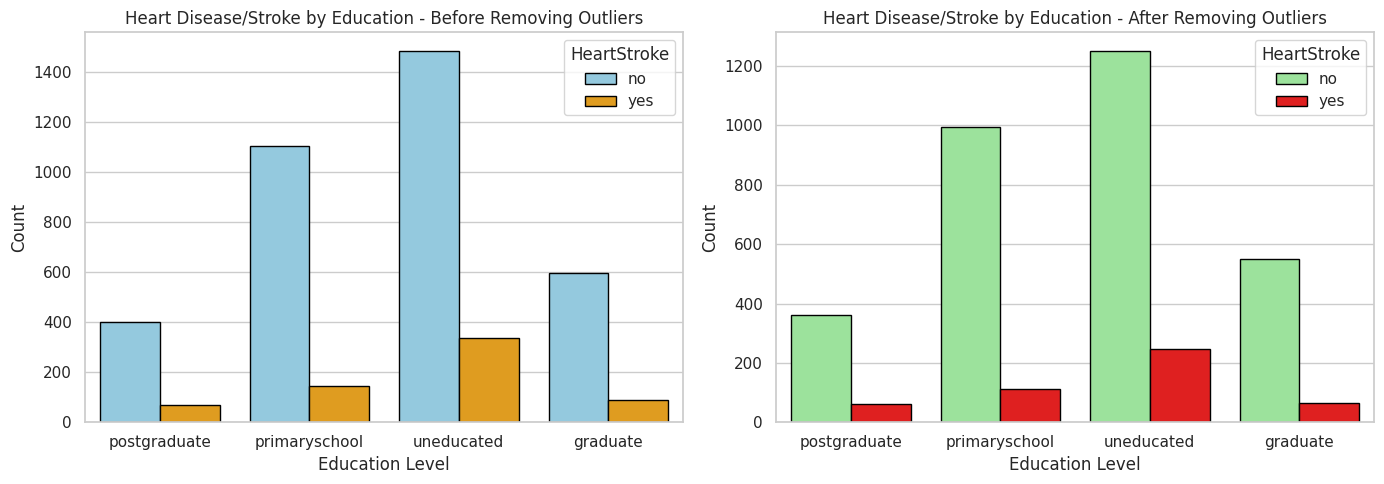

In [229]:
# 4.4.6 Plot comparison of Education vs. HeartStroke
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: df_clean (before removing outliers)
sns.countplot(data=df_clean, x='education', hue='HeartStroke', palette={'yes': 'orange', 'no': 'skyblue'}, edgecolor='black', ax=axes[0])
axes[0].set_title('Heart Disease/Stroke by Education - Before Removing Outliers')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Count')

# Plot 2: df_clean_outliers (after removing outliers)
sns.countplot(data=df_clean_outliers, x='education', hue='HeartStroke', palette={'yes': 'red', 'no': 'lightgreen'}, edgecolor='black', ax=axes[1])
axes[1].set_title('Heart Disease/Stroke by Education - After Removing Outliers')
axes[1].set_xlabel('Education Level')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**@Finding**

The category "uneducated" show a higher heart disease. In contrast, graduate and postgraduate have fewer cases.

After removing outliers (thr right plot), the overall count has decreased, as expected, but the trend is consistent before and after outlier removal.

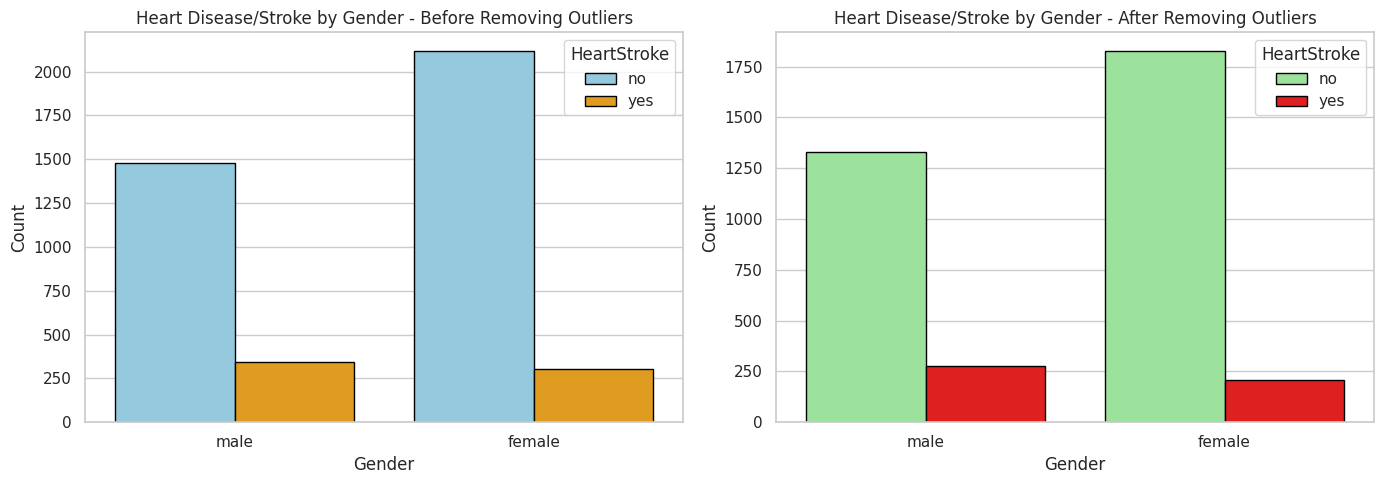

In [232]:
# 4.4.7 Plot comparison of gender vs. HeartStroke
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: df_clean (before removing outliers)
sns.countplot(data=df_clean, x='Gender', hue='HeartStroke', palette={'yes': 'orange', 'no': 'skyblue'}, edgecolor='black', ax=axes[0])
axes[0].set_title('Heart Disease/Stroke by Gender - Before Removing Outliers')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot 2: df_clean_outliers (after removing outliers)
sns.countplot(data=df_clean_outliers, x='Gender', hue='HeartStroke', palette={'yes': 'red', 'no': 'lightgreen'}, edgecolor='black', ax=axes[1])
axes[1].set_title('Heart Disease/Stroke by Gender - After Removing Outliers')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**@finding:**

Both males and females are represented in the dataset. However, the number of people with heart disease/stroke appears slightly higher among males. This could indicate a higher risk among male participants, though more analysis is needed.

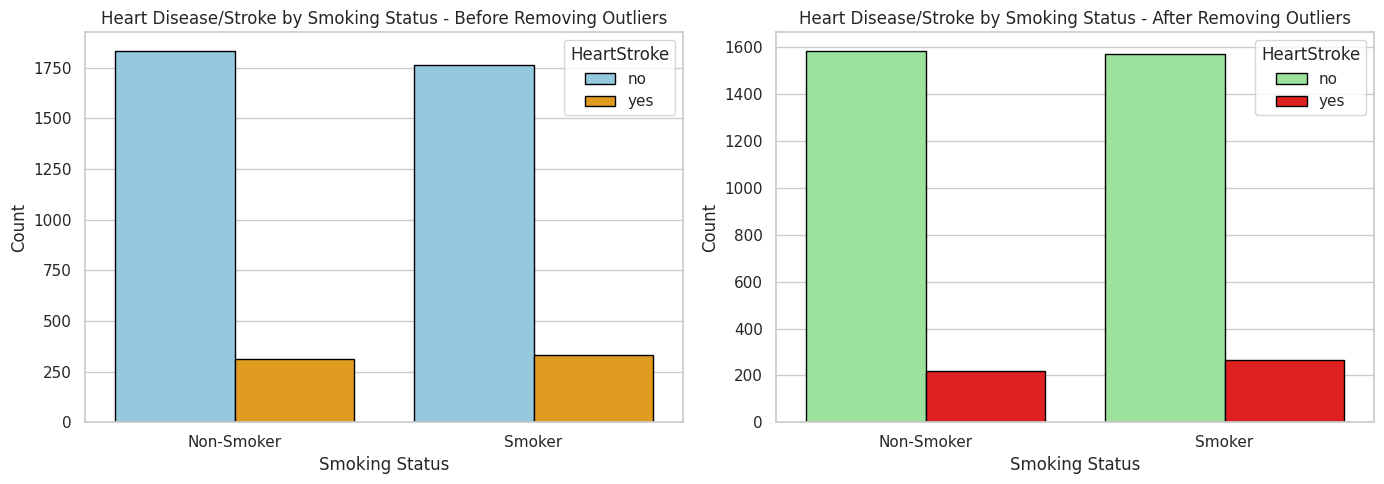

In [234]:
# 4.4.8 Plot comparison of currentSmoker vs. HeartStroke
# Create side-by-side plots

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: df_clean (before removing outliers)
sns.countplot(data=df_clean, x='currentSmoker', hue='HeartStroke', palette={'yes': 'orange', 'no': 'skyblue'}, edgecolor='black', ax=axes[0])
axes[0].set_title('Heart Disease/Stroke by Smoking Status - Before Removing Outliers')
axes[0].set_xlabel('Smoking Status')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])  # Set positions
axes[0].set_xticklabels(['Non-Smoker', 'Smoker'])  # Set labels

# Plot 2: df_clean_outliers (after removing outliers)
sns.countplot(data=df_clean_outliers, x='currentSmoker', hue='HeartStroke',  palette={'yes': 'red', 'no': 'lightgreen'}, edgecolor='black', ax=axes[1])
axes[1].set_title('Heart Disease/Stroke by Smoking Status - After Removing Outliers')
axes[1].set_xlabel('Smoking Status')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])  # Set positions
axes[1].set_xticklabels(['Non-Smoker', 'Smoker'])  # Set labels

plt.tight_layout()
plt.show()

**@finding:**

Smokers are more likely to be in the heart disease/stroke group than non-smokers. This supports the well-known link between smoking and cardiovascular risk.

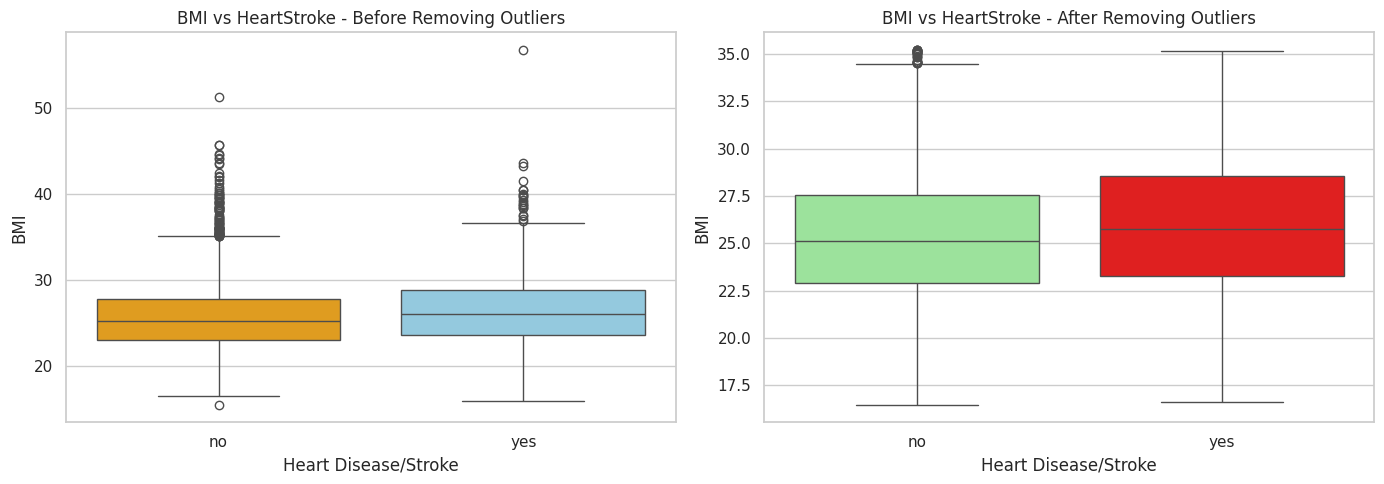

In [242]:
# 4.4.9 Boxplots (To check impact of numeric on target)
# BMI vs HeartStroke
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot 1: before removing outliers
sns.boxplot(data=df_clean, x='HeartStroke', y='BMI', palette={'no': 'orange', 'yes': 'skyblue'},  ax=axes[0])
axes[0].set_title('BMI vs HeartStroke - Before Removing Outliers')
axes[0].set_xlabel('Heart Disease/Stroke')
axes[0].set_ylabel('BMI')

# Boxplot 2: after removing outliers
sns.boxplot(data=df_clean_outliers, x='HeartStroke', y='BMI', palette={'no': 'lightgreen', 'yes': 'red'},   ax=axes[1])
axes[1].set_title('BMI vs HeartStroke - After Removing Outliers')
axes[1].set_xlabel('Heart Disease/Stroke')
axes[1].set_ylabel('BMI')

plt.tight_layout()
plt.show()

**@finding:**

The boxplot shows that individuals with heart disease tend to have slightly higher BMI on average. However, the difference is not dramatic, suggesting BMI may be a contributing factor, but not the strongest one.

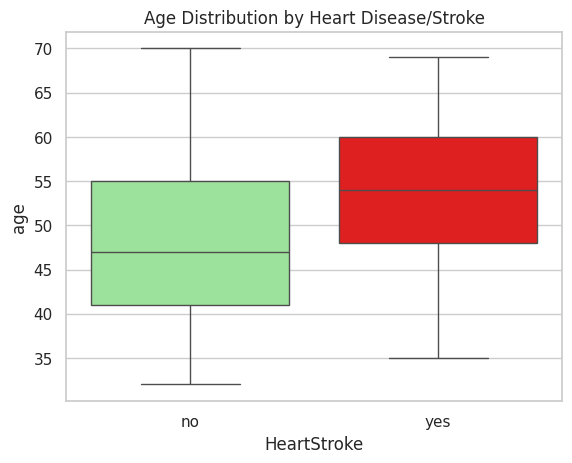

In [243]:
# 4.4.10 Age vs HeartStroke
sns.boxplot(data=df_clean_outliers, x='HeartStroke', y='age', palette={'no': 'lightgreen', 'yes': 'red'})
plt.title('Age Distribution by Heart Disease/Stroke')
plt.show()

**@finding:**

There is a clear trend: individuals who experienced heart disease tend to be older. This reinforces the role of age as a key risk factor in cardiovascular events.

# **5. Feature Engineering**

**Creating a simple classification model**

to predict whether a person has heart disease using the available health features.

I will use:

Features (like age, BMI, smoking status, blood pressure, etc.)
Target: HeartStroke (convert to binary: yes -> 1, no -> 0)

In [244]:
# 5.1Create BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obese I'
    elif 35 <= bmi < 40:
        return 'Obese II'
    else:
        return 'Obese III'

# Apply function to the BMI column
df_clean_outliers['BMI_Category'] = df_clean_outliers['BMI'].apply(categorize_bmi)

# Check the value counts
df_clean_outliers['BMI_Category'].value_counts()

,count
BMI_Category,
Normal,1696
Overweight,1535
Obese I,348
Underweight,47
Obese II,14


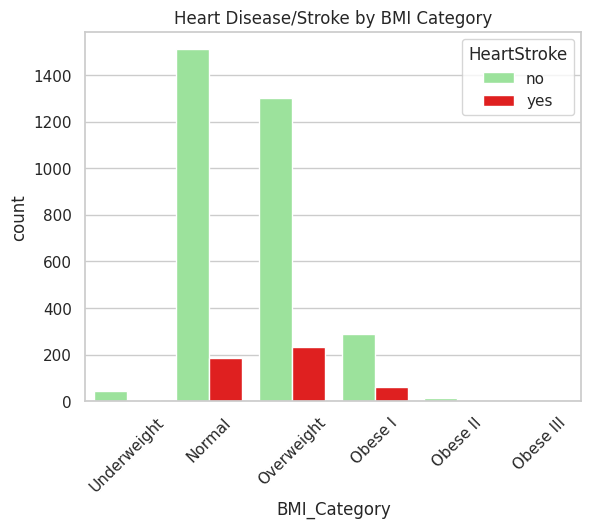

In [248]:
# 5.2 BMI Category vs Heart Disease/Stroke
sns.countplot(data=df_clean_outliers, x='BMI_Category', hue='HeartStroke', order=[
    'Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III'], palette={'no': 'lightgreen', 'yes': 'red'})
plt.title('Heart Disease/Stroke by BMI Category')
plt.xticks(rotation=45)
plt.show()

**@finding:**

People in the Overweight category appear to have higher risk than those at Normal weight.

Very high BMI (Obese II and III) might also increase risk, but the sample size is too small in the dataset to be confident.

Being "Normal" BMI doesn't completely protect against heart disease/stroke, other factors (like age, smoking, blood pressure) are likely at play.

In [249]:
# 5.3 Encode the Target Variable
# Convert target column to binary numeric values
df_clean_outliers['HeartStroke'] = df_clean_outliers['HeartStroke'].map({'yes': 1, 'no': 0})

In [250]:
# 5.4 One-Hot Encode Categorical Variables
# Drop BMI category (it's a derived feature, optional)
df_model = df_clean_outliers.drop(columns=['BMI_Category'])

# One-hot encoding for all categorical variables
df_model = pd.get_dummies(df_model, drop_first=True)

In [251]:
# 5.5 Remove rows where the target is missing
df_model = df_model[df_model['HeartStroke'].notna()]

# Just to be safe: drop any remaining rows with any NaN
df_model = df_model.dropna()

In [252]:
# 5.6 Size checking before splitting
print("Data shape after cleaning:", df_model.shape)

Data shape after cleaning: (3640, 18)


# **6. Train/Test split**

In [261]:
# 6.1 Split the Data
X = df_model.drop('HeartStroke', axis=1)
y = df_model['HeartStroke']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [262]:
# 6.2 To check again the shape of the splitted datas
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("Target distribution:", y_train.value_counts(normalize=True))

Train size: (2912, 17)
Test size: (728, 17)
Target distribution: HeartStroke
0    0.865385
1    0.134615
Name: proportion, dtype: float64


# **7. Regression Modeling**

* **Baseline Model**:  Logistic Regression

In [263]:
# 7.1 Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression


# Initialize and train the model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# 7.1 Predict on the test set
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

Accuracy: 0.8804945054945055

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       636
           1       0.86      0.07      0.12        92

    accuracy                           0.88       728
   macro avg       0.87      0.53      0.53       728
weighted avg       0.88      0.88      0.83       728



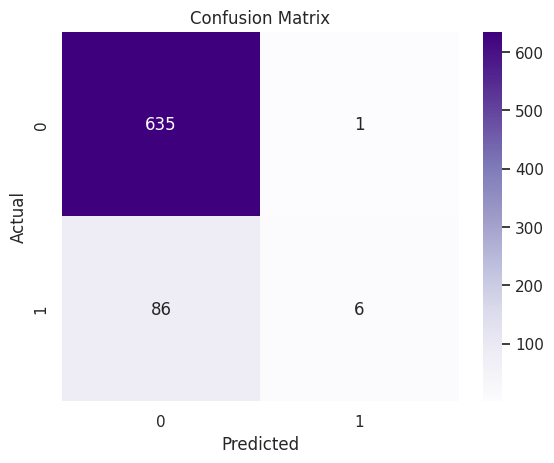

In [264]:
# 7.2 Evaluate the Model

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**@Finding**

* The model is very accurate on the majority class (no disease)
* it predicts 635 out of 636 correctly.
* This leads to a high overall accuracy (88%)
* Very poor recall on the minority class (1 = disease):
It only catches 6 out of 92 people who have heart disease.

**7.3 Compare Logistic Regression Performance**: With vs Without Scaling

In [265]:
#7.3 Compare Logistic Regression Performance: With vs Without Scaling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Model without scaling


model_unscaled = LogisticRegression(max_iter=5000, solver='saga')
model_unscaled.fit(X_train, y_train)

y_pred_unscaled = model_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Model with scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(max_iter=5000, solver='saga')
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print("Accuracy without scaling:", round(acc_unscaled * 100, 2), "%")
print("Accuracy with scaling:   ", round(acc_scaled * 100, 2), "%")

Accuracy without scaling: 87.23 %
Accuracy with scaling:    88.05 %


**@Finding:**

Feature scaling had a small positive effect on the performance of the Logistic Regression model. Accuracy improved from 87.23% without scaling to 88.05% with scaling. Although the overall improvement is minor, scaling ensures better model convergence and more reliable coefficient estimation, particularly when applying linear models.

**7.4 Pipeline with Preprocessor**

* Applyibg standardization, imputation, and encoding only to the appropriate
columns (numeric_cols, categorical_cols).
* Preventing data leakage by fitting transformers only on training data.

In [281]:
from sklearn.metrics import f1_score
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

print("Logistic Regression Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))

Logistic Regression Recall: 0.6847826086956522
F1 Score: 0.3289817232375979


**@Finding**

The model identified about 68.5% of people who had heart disease.

The F1 score of 32.9% is the harmonic mean of precision and recall.

**7.4 Plot the Precision-Recall Curve**

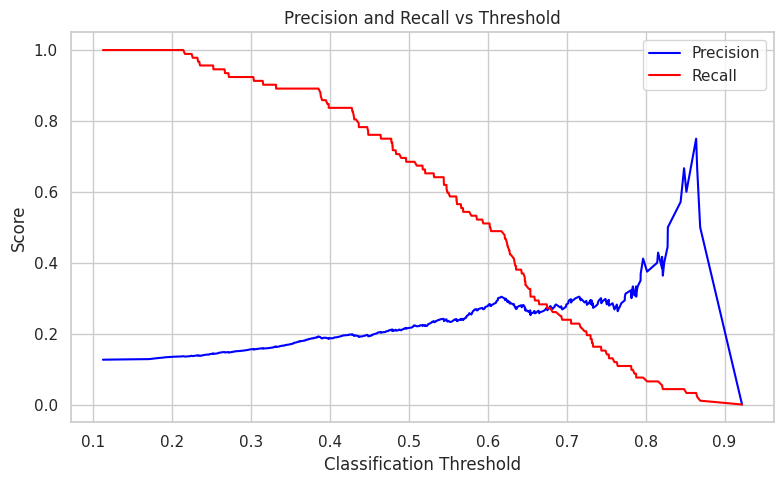

In [285]:
# 7.4 Plot the Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
# Predict probabilities for class 1
y_probs = logreg_pipeline.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='red')
plt.xlabel("Classification Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**@Finding**

The x-axis represents the classification threshold (ranging from 0 to 1), while the y-axis shows the score (precision and recall) also ranging from 0 to 1.

At a threshold of approximately 0.2 to 0.3, the model maximizes recall, meaning it correctly identifies most positive cases. However, this comes at the cost of many false positives, resulting in low precision.

At a threshold of around 0.7 to 0.9, the model becomes more conservative, predicting fewer positive cases. This leads to higher precision

**7.5 Optimal Threshold for F1**

In [286]:
# 7.5 To Find the Optimal Threshold for F1
from sklearn.metrics import f1_score
import numpy as np

f1_scores = [f1_score(y_test, y_probs >= t) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]

print("Best threshold for highest F1 score:", round(best_threshold, 2))

Best threshold for highest F1 score: 0.62


**@Finding**

The best threshold for highest F1 score is 0.62.


**7.6 Reevaluate by setting the best threshold for highes F1**

In [289]:
# 7.6 Setting threshold at 0.62
optimal_threshold = 0.62
y_pred_thresh = (y_probs >= optimal_threshold).astype(int)

# evaluate
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       636
           1       0.30      0.48      0.37        92

    accuracy                           0.79       728
   macro avg       0.61      0.66      0.62       728
weighted avg       0.84      0.79      0.81       728



**7.7 Confusion Matrix for Classification Results**

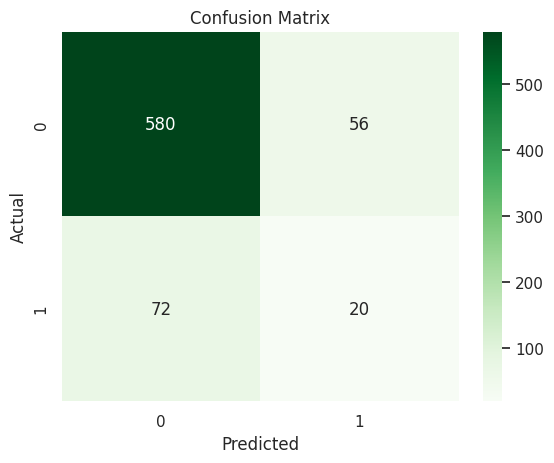

In [298]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**@Finding**

580 True Negatives (TN): correctly prediction people who do not have heart disease.

20 True Positives (TP):
The model correctly identified 20 people who do have heart disease.

56 False Positives (FP):
These people were predicted to have heart disease, but actually do not.

72 False Negatives (FN):
These people do have heart disease, but the model missed them.

# **8. Other Models**

**8.1. Naive Bayes**


In [301]:
# 8.1.1 Numerical and categorical preprocessing
# Numeric preprocessing
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical preprocessing
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

In [302]:
# 8.1.2 Combine transformers in a preprocessor
# ColumnTransformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [303]:
# 8.1.3 Naive Bayes Model Pipeline

# Full pipeline with GaussianNB
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

In [323]:
# 8.1.4 To fit & evaluate
# Fit and evaluate
nb_pipeline.fit(X_train, y_train)
y_pred_NB = nb_pipeline.predict(X_test)
recall_NB = recall_score(y_test, y_pred_NB)
f1_score_NB = f1_score(y_test, y_pred_NB)
print("Naive Bayes Model Recall:", recall_NB)
print("Naive Bayes Model F1 Score:", f1_score_NB)
print(classification_report(y_test, y_pred_NB))

Naive Bayes Model Recall: 0.21739130434782608
Naive Bayes Model F1 Score: 0.23809523809523808
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       636
           1       0.26      0.22      0.24        92

    accuracy                           0.82       728
   macro avg       0.58      0.56      0.57       728
weighted avg       0.81      0.82      0.82       728



**@Finding**

People who truly had heart disease, the model only identified ~21.7% of them
This is very low recall, which means the model is missing most of the positive cases and the false negatives are high.

The model has a low F1 score, which means both precision and recall are weak, and the model performs poorly at identifying and correctly classifying the positive class.

In [305]:
#best params
nb_params

{'bayes__alpha': [1, 0.1, 0.01, 0.001, 0]}

**8.2 SVM Pipeline**

SVM Recall: 0.6521739130434783
SVM F1 Score: 0.32345013477088946
              precision    recall  f1-score   support

           0       0.93      0.66      0.77       636
           1       0.22      0.65      0.32        92

    accuracy                           0.66       728
   macro avg       0.57      0.65      0.55       728
weighted avg       0.84      0.66      0.71       728



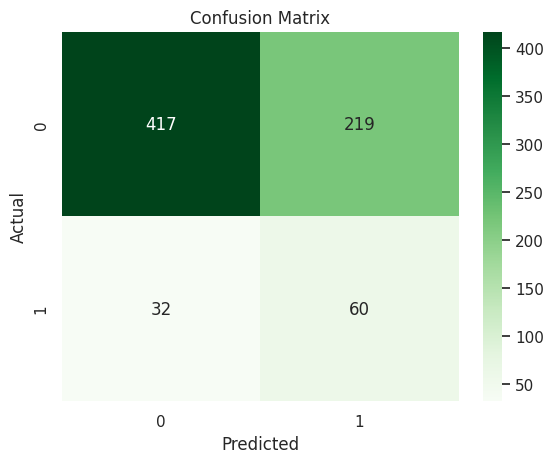

In [324]:
# 8.2 SVM Pipeline
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', probability=True, class_weight='balanced'))
])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)
recall_SVM= recall_score(y_test, y_pred_svm)
f1_score_SVM = f1_score(y_test, y_pred_svm)
print("SVM Recall:", recall_SVM)
print("SVM F1 Score:", f1_score_SVM)
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**8.3 Random Forest**

Random Forest Recall: 0.021739130434782608
F1 Score: 0.041666666666666664
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       636
           1       0.50      0.02      0.04        92

    accuracy                           0.87       728
   macro avg       0.69      0.51      0.49       728
weighted avg       0.83      0.87      0.82       728



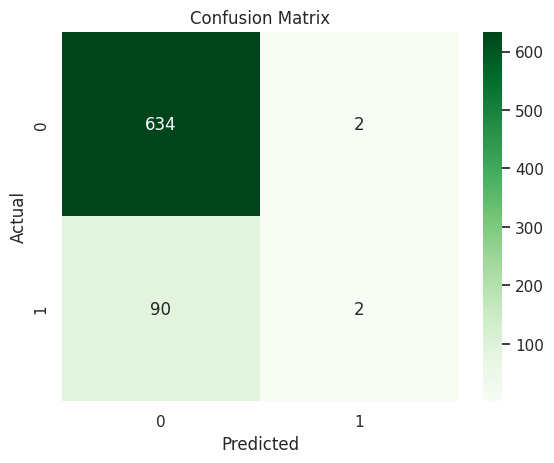

In [325]:
# 8.3 Random Forest Pipeline
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
recall_rf= recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
print("Random Forest Recall:", recall_rf)
print("F1 Score:", f1_score_rf)
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**8.4 K-Nearest Neighbors**

KNN Recall: 0.08695652173913043
F1 Score: 0.1415929203539823
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       636
           1       0.38      0.09      0.14        92

    accuracy                           0.87       728
   macro avg       0.63      0.53      0.53       728
weighted avg       0.82      0.87      0.83       728



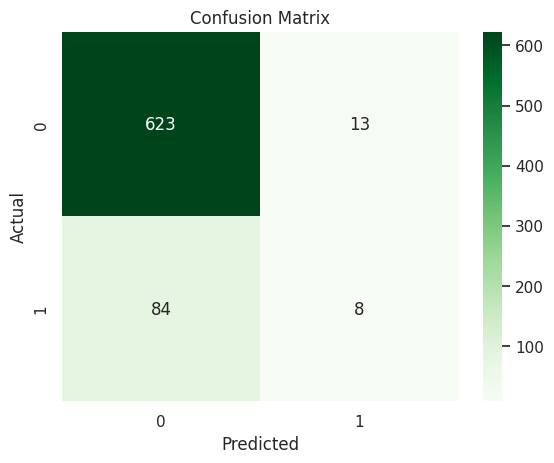

In [326]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn= f1_score(y_test, y_pred_knn)
print("KNN Recall:", recall_knn)
print("F1 Score:", f1_score_knn)
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(max_iter=1000, random_state=42)

**8.5 XGB Model**

Recall: 0.08695652173913043
F1 Score: 0.13333333333333333
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       636
           1       0.29      0.09      0.13        92

    accuracy                           0.86       728
   macro avg       0.58      0.53      0.53       728
weighted avg       0.80      0.86      0.82       728



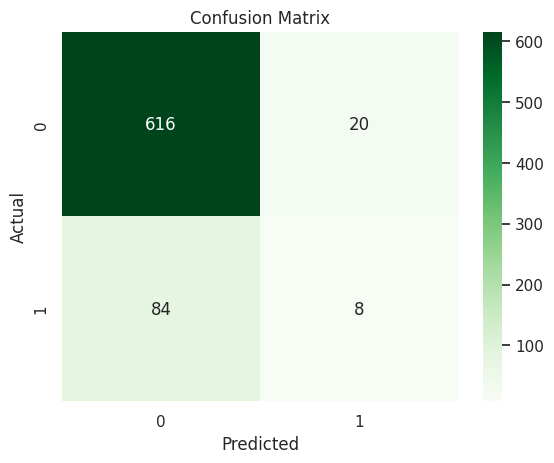

In [327]:
# 8.5 XGB Model
from xgboost import XGBClassifier
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**8.6 MLP Classifier**

In [330]:
from sklearn.neural_network import MLPClassifier
mlp_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(max_iter=1000, random_state=42))
])
mlp_pipeline.fit(X_train, y_train)
y_pred_mlp = mlp_pipeline.predict(X_test)

print("MLPClassifier Results (Original Data)")
print("Recall:", recall_score(y_test, y_pred_mlp))
print("F1 Score:", f1_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

MLPClassifier Results (Original Data)
Recall: 0.07608695652173914
F1 Score: 0.11382113821138211
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       636
           1       0.23      0.08      0.11        92

    accuracy                           0.85       728
   macro avg       0.55      0.52      0.52       728
weighted avg       0.80      0.85      0.82       728



**8.7 Comparison between models**

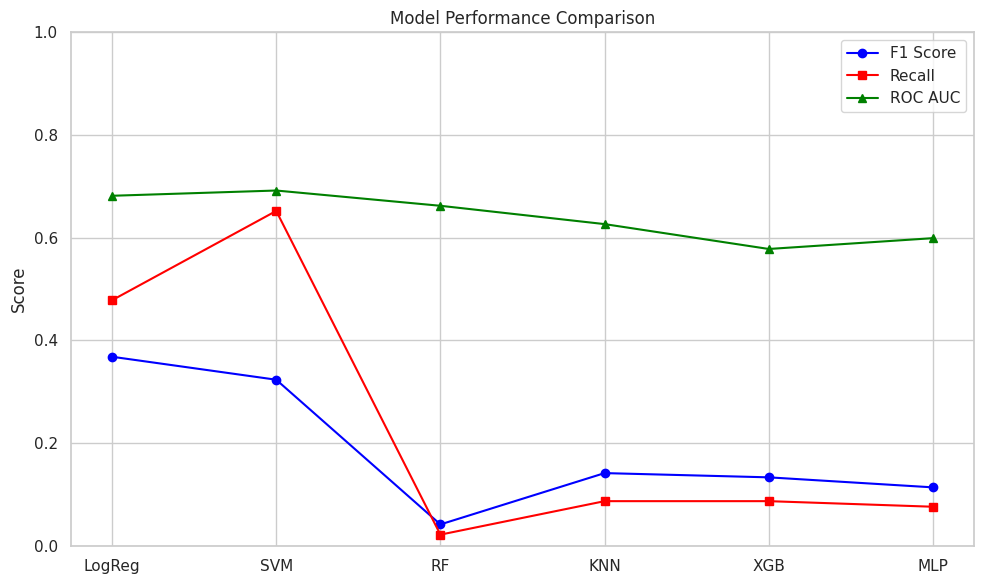

In [340]:
from sklearn.metrics import f1_score, recall_score, roc_auc_score

# For models that support predict_proba
y_prob_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]
y_prob_rf     = rf_pipeline.predict_proba(X_test)[:, 1]
y_prob_svm     = svm_pipeline.predict_proba(X_test)[:, 1]
y_prob_knn    = knn_pipeline.predict_proba(X_test)[:, 1]
y_prob_xgb    = xgb_pipeline.predict_proba(X_test)[:, 1]
y_prob_mlp    = mlp_pipeline.predict_proba(X_test)[:, 1]

model_scores = {
    'LogReg': {
        'f1': f1_score(y_test, y_pred_thresh),
        'recall': recall_score(y_test, y_pred_thresh),
        'roc_auc': roc_auc_score(y_test, y_prob_logreg)
    },
    'SVM': {
        'f1': f1_score(y_test, y_pred_svm),
        'recall': recall_score(y_test, y_pred_svm),
        'roc_auc': roc_auc_score(y_test, y_prob_svm)
    },
    'RF': {
        'f1': f1_score(y_test, y_pred_rf),
        'recall': recall_score(y_test, y_pred_rf),
        'roc_auc': roc_auc_score(y_test, y_prob_rf)
    },
    'KNN': {
        'f1': f1_score(y_test, y_pred_knn),
        'recall': recall_score(y_test, y_pred_knn),
        'roc_auc': roc_auc_score(y_test, y_prob_knn)
    },
    'XGB': {
        'f1': f1_score(y_test, y_pred_xgb),
        'recall': recall_score(y_test, y_pred_xgb),
        'roc_auc': roc_auc_score(y_test, y_prob_xgb)
    },
    'MLP': {
        'f1': f1_score(y_test, y_pred_mlp),
        'recall': recall_score(y_test, y_pred_mlp),
        'roc_auc': roc_auc_score(y_test, y_prob_mlp)
    }
}

df_scores = pd.DataFrame(model_scores).T.reset_index().rename(columns={'index': 'Model'})

plt.figure(figsize=(10, 6))

plt.plot(df_scores['Model'], df_scores['f1'], marker='o', label='F1 Score', color='blue')
plt.plot(df_scores['Model'], df_scores['recall'], marker='s', label='Recall', color='red')
plt.plot(df_scores['Model'], df_scores['roc_auc'], marker='^', label='ROC AUC', color='green')

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**@Finding**

SVM is the best for recall (catching true positives).

Logistic Regression is the most balanced overall.

Random Forest performs worst.

KNN, XGB, and MLP are moderate in AUC but weak in recall and F1.

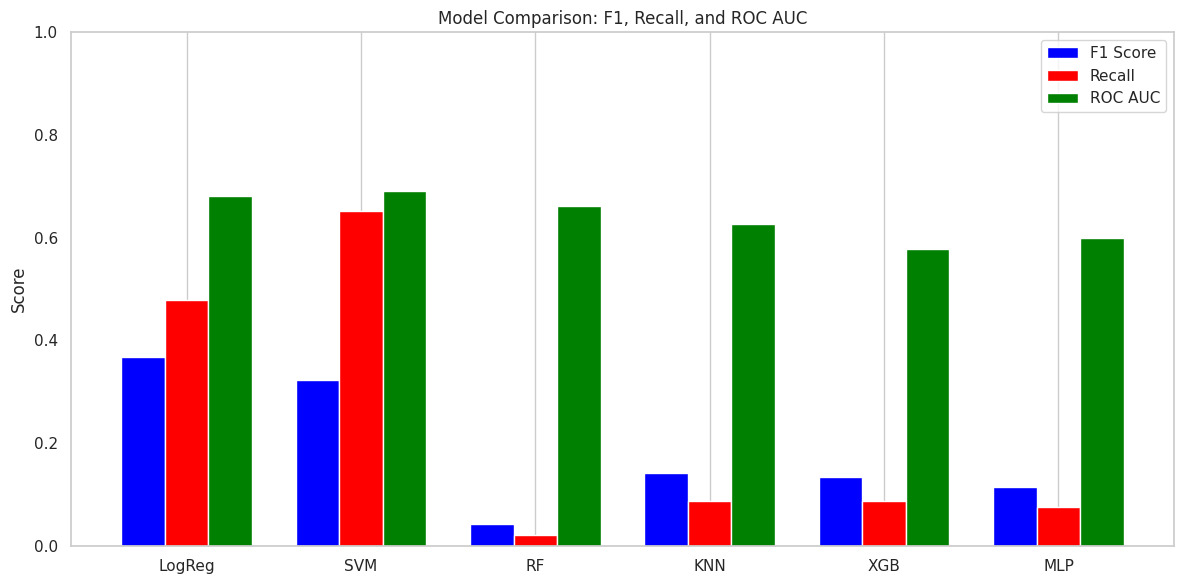

In [346]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score # Corrected import location
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bar_width = 0.25
x = range(len(df_scores))

# Plot F1 Score
plt.bar([i - bar_width for i in x], df_scores['f1'], width=bar_width, label='F1 Score', color='blue')

# Plot Recall
plt.bar(x, df_scores['recall'], width=bar_width, label='Recall', color='red')

# Plot ROC AUC
plt.bar([i + bar_width for i in x], df_scores['roc_auc'], width=bar_width, label='ROC AUC', color='green')

# Labels and formatting
plt.xticks(ticks=x, labels=df_scores['Model'])
plt.ylabel('Score')
plt.title('Model Comparison: F1, Recall, and ROC AUC')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


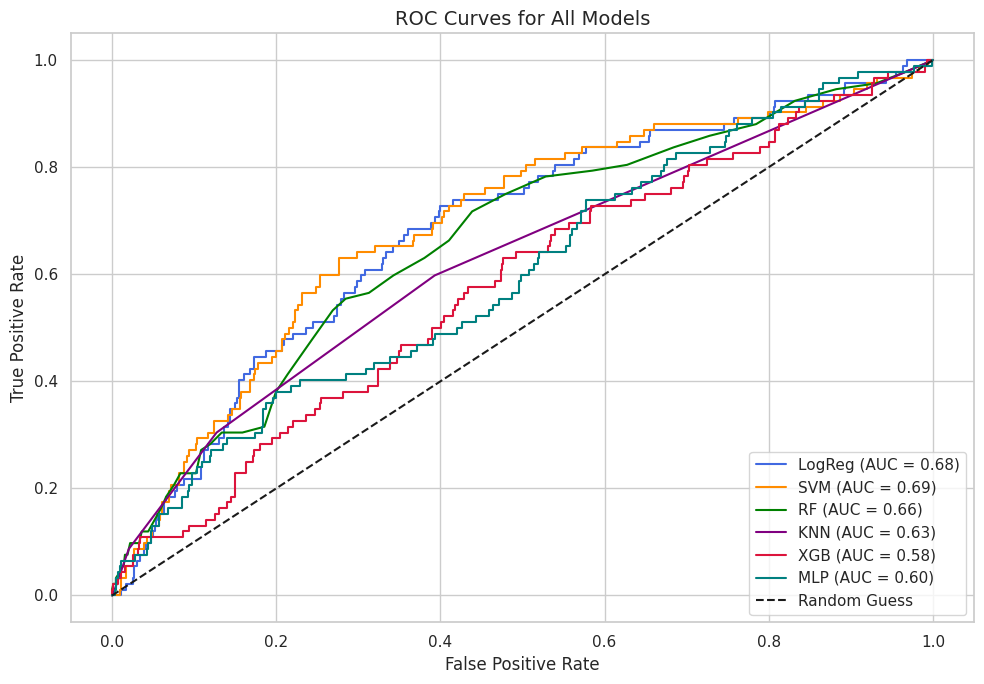

In [348]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Define model probabilities
model_probs = {
    'LogReg': y_prob_logreg,
    'SVM': y_prob_svm,
    'RF': y_prob_rf,
    'KNN': y_prob_knn,
    'XGB': y_prob_xgb,
    'MLP': y_prob_mlp
}

# Optional: Define specific colors (Matplotlib named colors or HEX codes)
colors = {
    'LogReg': 'royalblue',
    'SVM': 'darkorange',
    'RF': 'green',
    'KNN': 'purple',
    'XGB': 'crimson',
    'MLP': 'teal'
}

plt.figure(figsize=(10, 7))

# Plot ROC curve for each model
for model_name, y_prob in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})", color=colors[model_name])

# Diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Formatting
plt.title("ROC Curves for All Models", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


**@Finding**

This plot shows the ROC (Receiver Operating Characteristic) curves for six classification models, and it gives us a strong visual insight into how well each model separates positive and negative classes.

SVM has the highest AUC, meaning the most effective at ranking positive vs. negative cases. It's the best trade-off between sensitivity and specificity.

Logistic Regression and Random Forest are close runners-up.

XGB and MLP underperform

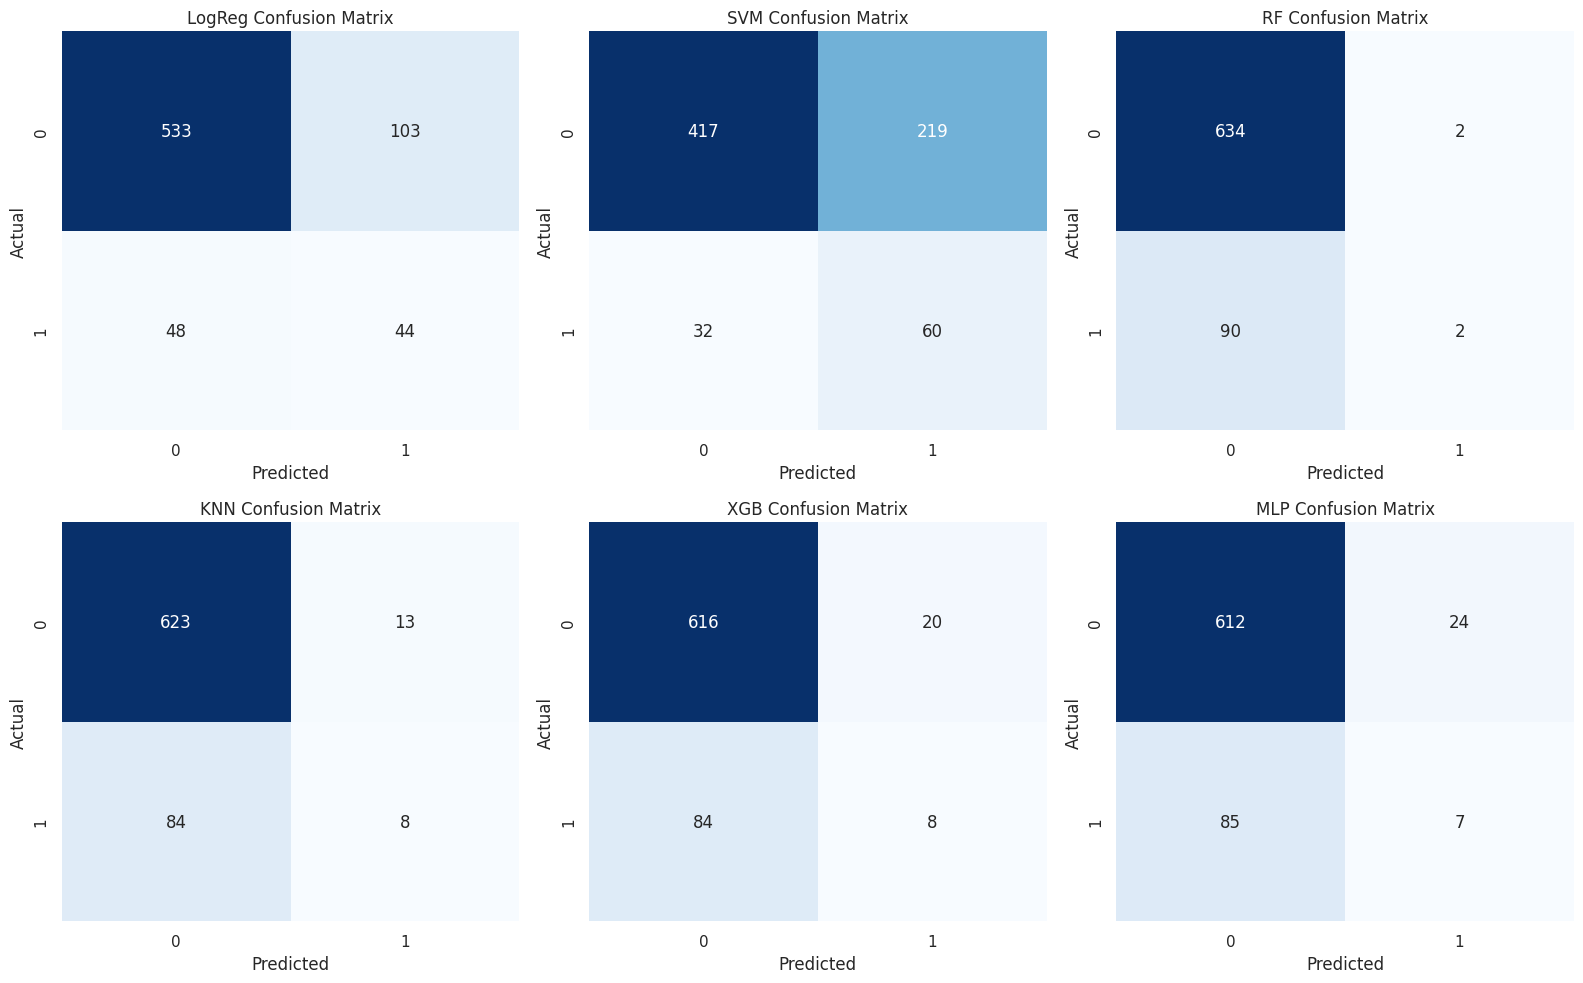

In [352]:
# 8. Confusion Matrices

model_preds = {
    'LogReg': y_pred_thresh,
    'SVM': y_pred_svm,
    'RF': y_pred_rf,
    'KNN': y_pred_knn,
    'XGB': y_pred_xgb,
    'MLP': y_pred_mlp
}
# Create 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# Plot for each model
for ax, (model_name, y_pred) in zip(axes, model_preds.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Adjust layout
plt.tight_layout()
plt.show()


**@Finding**

SVM has high recall (65%), meaning it's the best at identifying true heart disease.

Logistic Regression is a good balance between precision and recall, catching almost half of the positive cases.

RF, KNN, XGB, MLP all heavily favor predicting class 0. These models are likely overfitting the dominant class.

# **9. Hyperparameter Tuning**

In the following steps, I am going to use GridSearchCV to tune all 6 models

In [354]:
# 9.1 Model pipelines and parameter grids
models_params = {
    "LogReg": {
        "model": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
        "params": {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['liblinear']
        }
    },
    "SVM": {
        "model": SVC(probability=True, class_weight='balanced', random_state=42),
        "params": {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto']
        }
    },
    "RF": {
        "model": RandomForestClassifier(class_weight='balanced', random_state=42),
        "params": {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20],
            'classifier__min_samples_split': [2, 5]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    },
    "XGB": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "params": {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__subsample': [0.8, 1.0]
        }
    },
    "MLP": {
        "model": MLPClassifier(max_iter=1000, random_state=42),
        "params": {
            'classifier__hidden_layer_sizes': [(50,), (100,), (50,50)],
            'classifier__activation': ['relu', 'tanh'],
            'classifier__alpha': [0.0001, 0.001]
        }
    }
}


In [355]:
# 9.2 Run GridSearchCV for each model
import time

best_models = {}

for name, config in models_params.items():
    print(f"\nTuning {name}...")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', config["model"])
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid=config["params"],
        scoring='roc_auc',
        cv=5,
        n_jobs=-1
    )

    start = time.time()
    grid.fit(X_train, y_train)
    duration = time.time() - start

    best_models[name] = {
        "best_estimator": grid.best_estimator_,
        "best_params": grid.best_params_,
        "cv_score": grid.best_score_,
        "time": duration
    }

    print(f"Best Params for {name}: {grid.best_params_}")
    print(f"Best ROC AUC (CV): {grid.best_score_:.4f}")
    print(f"Time: {duration:.2f} seconds")


Tuning LogReg...
Best Params for LogReg: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
Best ROC AUC (CV): 0.6938
Time: 3.62 seconds

Tuning SVM...
Best Params for SVM: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best ROC AUC (CV): 0.6948
Time: 112.93 seconds

Tuning RF...
Best Params for RF: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best ROC AUC (CV): 0.6637
Time: 39.41 seconds

Tuning KNN...
Best Params for KNN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
Best ROC AUC (CV): 0.6064
Time: 3.25 seconds

Tuning XGB...
Best Params for XGB: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best ROC AUC (CV): 0.6864
Time: 11.67 seconds

Tuning MLP...
Best Params for MLP: {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden

In [357]:
# 9.3 Build a summary DataFrame from the best_models dictionary
param_summary = pd.DataFrame([
    {
        "Model": name,
        "ROC AUC (CV)": round(model["cv_score"], 4),
        "Best Params": model["best_params"],
        "Time (s)": round(model["time"], 2)
    }
    for name, model in best_models.items()
])

# Sort by ROC AUC descending
param_summary = param_summary.sort_values(by="ROC AUC (CV)", ascending=False).reset_index(drop=True)

# Display the summary table
print(param_summary)

    Model  ROC AUC (CV)                                        Best Params  \
0     SVM        0.6948  {'classifier__C': 1, 'classifier__gamma': 'sca...   
1  LogReg        0.6938  {'classifier__C': 0.1, 'classifier__solver': '...   
2     XGB        0.6864  {'classifier__learning_rate': 0.01, 'classifie...   
3      RF        0.6637  {'classifier__max_depth': 20, 'classifier__min...   
4     MLP        0.6195  {'classifier__activation': 'relu', 'classifier...   
5     KNN        0.6064  {'classifier__metric': 'manhattan', 'classifie...   

   Time (s)  
0    112.93  
1      3.62  
2     11.67  
3     39.41  
4    719.77  
5      3.25  


**@Finding**

Best Overall Performer: SVM with the highest ROC AUC (0.6948)

Balanced + Efficient: Logistic Regression is close in AUC (0.6938) and trained very fast.

Random Forest showed good AUC (0.66)

MLP had a modest AUC (0.62) but very high training time, making it less practical here.

KNN underperformed (AUC ~0.61)

XGBoost gave competitive results (0.6864) with reasonable training time

**9.4 Collect performance metrics (Accuracy, Recall, F1, ROC AUC, etc.)**

In [359]:
9.4 Collect performance metrics (Accuracy, Recall, F1, ROC AUC, etc.)
# Dictionary to store results
evaluation_results = []

# Loop through each best model from GridSearchCV
for name, model_data in best_models.items():
    model = model_data["best_estimator"]

    # Predict class and probability
    y_pred = model.predict(X_test)
    if hasattr(model.named_steps['classifier'], "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # Use decision function for models
        y_score = model.decision_function(X_test)
        y_prob = (y_score - y_score.min()) / (y_score.max() - y_score.min())  # normalize to 0–1

    # Store metrics
    evaluation_results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Recall": round(recall_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred), 3),
        "F1 Score": round(f1_score(y_test, y_pred), 3),
        "ROC AUC": round(roc_auc_score(y_test, y_prob), 3)
    })

# Convert to DataFrame
eval_df = pd.DataFrame(evaluation_results)

# Sort by ROC AUC
eval_df = eval_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)

# Display
print("\nModel Evaluation Summary:")
print(eval_df)



Model Evaluation Summary:
    Model  Accuracy  Recall  Precision  F1 Score  ROC AUC
0  LogReg     0.646   0.685      0.216     0.328    0.722
1     SVM     0.643   0.685      0.214     0.326    0.722
2     XGB     0.874   0.000      0.000     0.000    0.704
3     MLP     0.861   0.076      0.304     0.122    0.663
4      RF     0.868   0.022      0.250     0.040    0.659
5     KNN     0.865   0.087      0.364     0.140    0.607


**@Finding**

While models like XGBoost and RF report high accuracy, they fail to detect true positive cases, likely due to class imbalance.

The Logistic Regression and SVM models strike a better balance between recall and AUC, making them more appropriate for healthcare-related prediction tasks where detecting positive cases is crucial.

# **10. Selecting best model**

**10.1 Final Evaluation for SVM Model**

In [363]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the best SVM model
best_svm_model = best_models['SVM']['best_estimator']

# Predict class and probabilities
y_pred_svm = best_svm_model.predict(X_test)
y_prob_svm = best_svm_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report for SVM:\n")
print(classification_report(y_test, y_pred_svm))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_svm)
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Recall Score: {recall_score(y_test, y_pred_svm):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm):.2f}")


Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.93      0.64      0.76       636
           1       0.21      0.68      0.33        92

    accuracy                           0.64       728
   macro avg       0.57      0.66      0.54       728
weighted avg       0.84      0.64      0.70       728

ROC AUC Score: 0.72
Recall Score: 0.68
F1 Score: 0.33


**10.2 Confusion Matrix**

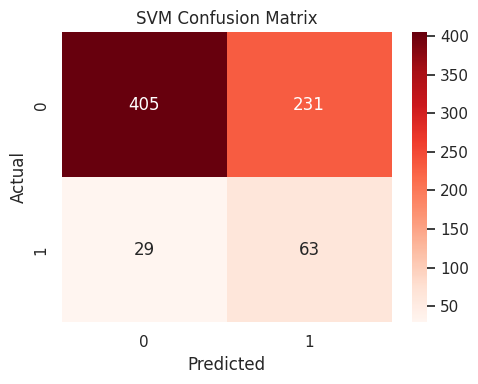

In [373]:
# Confusion Matrix Plot
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Reds')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


**@Finding**

* True Positives (TP): 63 : correctly predicted positive cases
* True Negatives (TN): 405 : correctly predicted negative cases
* False Positives (FP): 231 : incorrectly predicted positive cases
* False Negatives (FN): 29 : actual positives predicted as negative

Recall=(TruePositives+FalseNegatives)/(TruePositives)= (63+29)/63 = 0.6848

The model performs well in identifying actual positives (Recall ≈ 68%).
However, false positives are quite high (231 cases), reducing precision.

**10.3 ROC Curve**

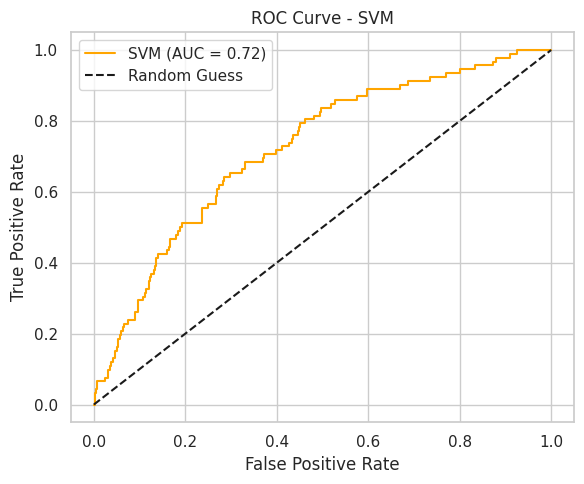

In [374]:
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})", color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**@Finding**

AUC of 0.72 is considered moderately good, especially for imbalanced datasets.

**10.4 Precision-Recall Curve**

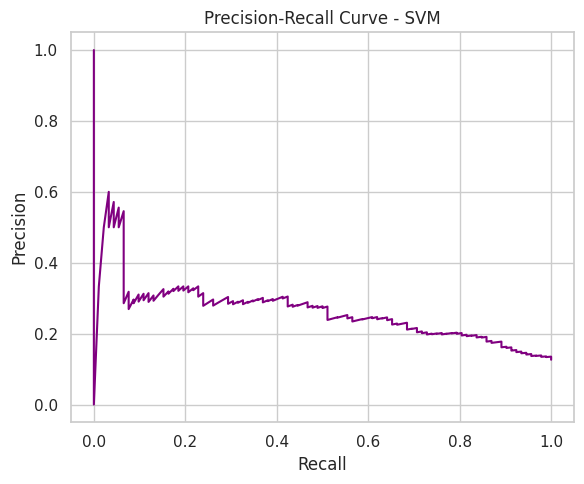

In [375]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - SVM")
plt.grid(True)
plt.tight_layout()
plt.show()

**@Finding:**

This Precision-Recall (PR) curve helps evaluate the trade-off between precision and recall for the SVM classifier.

The model can identify a few true positives very confidently, but struggles with broader detection.

This suggests a recall-precision imbalance, typical for imbalanced datasets.

**10.5 Cross-validation and Final Model Evaluation (SVM)**

In [371]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report

# Use best-tuned SVM model
best_model = best_models['SVM']['best_estimator']

# Cross-validation (using ROC AUC since it's a classifier)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_auc_train = cross_val_score(best_model, X_train, y_train, scoring="roc_auc", cv=cv, n_jobs=-1)

# Fit final model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Test metrics
auc_test = roc_auc_score(y_test, y_prob)
recall_test = recall_score(y_test, y_pred)
f1_test = f1_score(y_test, y_pred)

# Results dictionary
BestModelResults = {
    "Model": "SVM",
    "CV ROC AUC (Mean)": round(np.mean(cv_auc_train), 3),
    "Test ROC AUC": round(auc_test, 3),
    "Recall": round(recall_test, 3),
    "F1 Score": round(f1_test, 3)
}

for key, value in BestModelResults.items():
    print(f"\033[1m{key}:\033[0m {value}")


Model: SVM
CV ROC AUC (Mean): 0.704
Test ROC AUC: 0.722
Recall: 0.685
F1 Score: 0.326


**10.6 VIF (Variance Inflation Factor)**

In [377]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get the names of numeric columns used in the pipeline
numeric_cols = preprocessor.transformers_[0][2]

# Extract just the numeric part of X_train
X_numeric_raw = X_train[numeric_cols]

# Transform with numeric pipeline ONLY
X_numeric_scaled = preprocessor.named_transformers_['num'].transform(X_numeric_raw)

# Turn into DataFrame
X_numeric_df = pd.DataFrame(X_numeric_scaled, columns=numeric_cols)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric_df.values, i) for i in range(X_numeric_df.shape[1])]

# Sort VIFs
vif_data = vif_data.sort_values(by="VIF", ascending=False)
vif_data


,Feature,VIF
7,sysBP,3.284288
8,diaBP,2.640691
1,currentSmoker,2.500683
2,cigsPerDay,2.431168
4,prevalentHyp,2.004338
0,age,1.319358
9,BMI,1.170135
6,totChol,1.126217
3,BPMeds,1.073490
10,heartRate,1.059590


**@Finding:**

Variance Inflation Factor (VIF) was used to assess multicollinearity among numeric predictors.

The highest VIF observed was 3.28 for sysBP, suggesting moderate but acceptable correlation. Therefore, no variables need to be removed, and all predictors are suitable for use in the model.

**10.7 Classification Residuals**

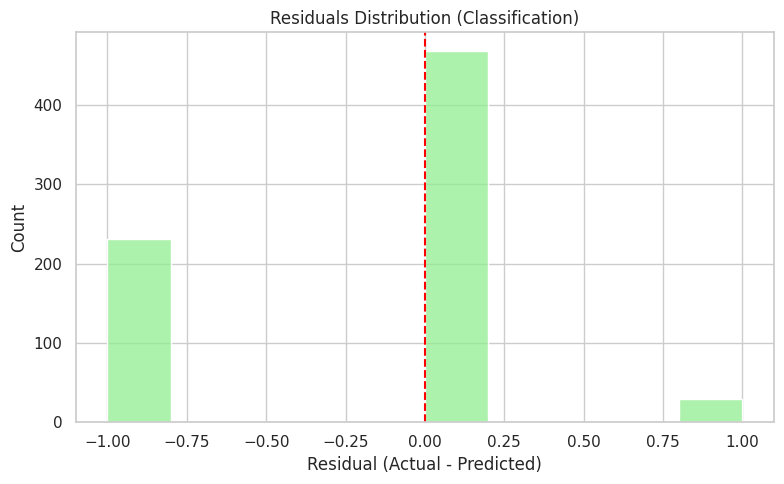

In [381]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=10, kde=False, color='lightgreen')
plt.axvline(0, color='red', linestyle='--')
plt.title("Residuals Distribution (Classification)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**@Finding**

The plot shows the distribution of residuals, which is difference between actual and predicted values for the classification model.

Residuals in classification are typically discrete:

* 0 --> correct prediction
* -1 --> false negative (predicted 0, actual was 1)
* +1 --> false positive (predicted 1, actual was 0)

A majority of predictions are correct, as shown by the tall bar at residual = 0.

The second most frequent case is -1, indicating some false negatives (model missed actual positive cases).

A small number of +1 residuals suggests relatively few false positives.

The model performs reasonably well, but tends to miss some positive cases (heart disease)

Since false negatives may have critical consequences in medical contexts, further tuning or threshold adjustment could be explored to improve recall

# **11. Model interpretation**

In [412]:
from sklearn.exceptions import NotFittedError
# Extract best model
best_model = best_models['SVM']['best_estimator']
# Manually fit OneHotEncoder on training categorical columns
X_cat = X_train[cat_cols]  # Use the original categorical data
ohe_encoder.fit(X_cat)

# Get feature names
ohe_feature_names = ohe_encoder.get_feature_names_out(cat_cols)

# Combine with numeric column names
all_feature_names = list(num_cols) + list(ohe_feature_names)

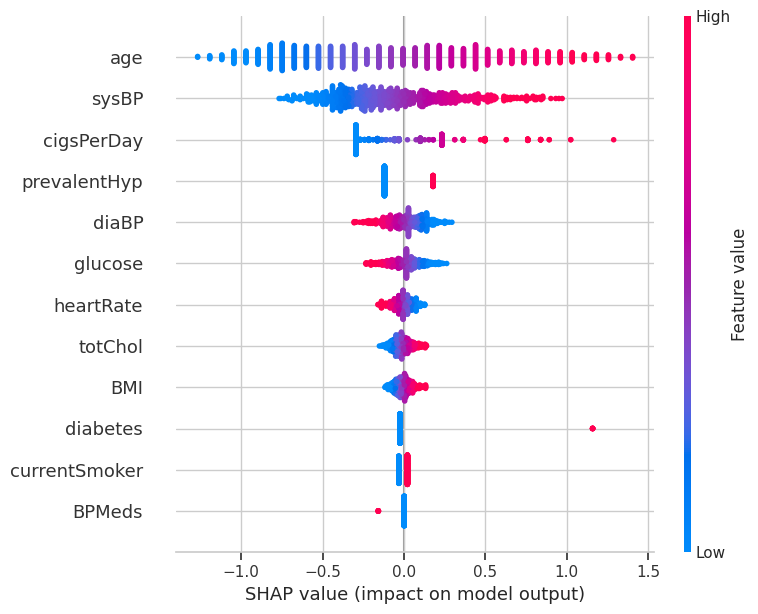

In [413]:
from scipy.sparse import issparse
X_test_transformed = fitted_preprocessor.transform(X_test)
if issparse(X_test_transformed):
    X_test_transformed = X_test_transformed.toarray()

explainer = shap.Explainer(best_model.named_steps['classifier'], X_test_transformed)
shap_values = explainer(X_test_transformed)

shap.summary_plot(shap_values, features=X_test_transformed, feature_names=all_feature_names)

**@Finding**

"*This SHAP (SHapley Additive Explanations) summary plot* *shows how each feature impacts the model's predictions.*

*How to understand this:*

*x-axis (Impact on Model Output)*
*Negative values decrease the predicted speaking proficiency.*
*Positive values increase the predicted speaking proficiency.*
*y-axis (Model Features)*
*The order of the features on the Y-axis is based on overall importance.*
*Color (Feature Value Intensity)*
*Red → Feature is at its higher range.*
*Blue → Feature is at its lower range.*"

**Top Influential Features**

1. age: most impactful. Higher age (red) pushes the prediction toward having heart disease.

2. sysBP (Systolic Blood Pressure): higher blood pressure → higher likelihood of disease.

3. cigsPerDay: more cigarettes per day (red) increases the probability of heart disease.

4. prevalentHyp (prevalent hypertension): Presence of hypertension increases prediction for heart risk.

5. diaBP (Diastolic Blood Pressure):Moderate influence, similar to systolic BP.

**Lower-Impact Features**

BPMeds, currentSmoker, diabetes, BMI, totChol, heartRate

# **12. Result**

**Final Report - Heart Disease Prediction using Machine Learning**

In this project, we aimed to predict the risk of heart disease or stroke using different machine learning models based on patient health data. We cleaned the data, handled missing values and outliers, and tested several models: Logistic Regression, SVM, Random Forest, K-Nearest Neighbors, XGBoost, and MLP.

After comparing their performance using accuracy, recall, F1 score, and ROC AUC, we selected Support Vector Machine (SVM) as the best model.

**Why SVM?**

Recall: 0.685, this means it correctly identified about 69% of true heart disease/stroke cases.

F1 Score: 0.326, this shows a balance between precision and recall.

ROC AUC: 0.722, this indicates the model is fairly good at distinguishing between positive and negative cases.

Other models like XGBoost and Random Forest had higher accuracy but much lower recall. This means they often missed actual cases, which is risky in health predictions. Therefore, SVM gives a better trade-off, especially when recall is more important.

**Visual Results:**

The confusion matrix showed that SVM correctly predicted most non-disease cases and a good number of true disease cases.

The ROC curve showed good separation from the random guess line.

The SHAP analysis revealed that age, systolic blood pressure, and cigarettes per day had the most influence on predictions.

The residual plot showed most predictions were accurate with few errors.

**Conclusion:**

SVM performed best for this classification task, especially because of its high recall. This model can be useful in real-world settings to support early detection of heart disease or stroke risk, which can help prevent serious outcomes.